In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'D:\3\0 Data Analyst\Uci dataset\CM Analysis.xlsx')
df.head()

Buyer Program No Sewing Layout No        Style Name  Order Quantity  \
0  SAINSBURYS      T8641        T8641/270  2PK Leggings new           13000   
1  SAINSBURYS      T8236        T8236/246  2PK Leggings new             600   
2  SAINSBURYS      T8364        T8364/258  2PK Leggings new            7500   
3  SAINSBURYS      T8365        T8365/251  2PK Leggings new            9000   
4  SAINSBURYS      T8365        T8365/250  2PK Leggings new            2600   

       Line  Total Production Quantity  Total SMV  Normal Target  \
0     E3-I2                      13055       2.97            296   
1   E3(2)-B                        594       2.97            455   
2     E3-I2                       6800       2.97            296   
3  E3(2)-I2                       4898       2.97            296   
4     E3-I2                       2670       2.97            296   

   Bonus Target  Total Hour  Pre Costing CM  Sewing Layout CM  Achive CM  
0           355       45.53            4.23              3.00       2.95  
1           546        3.09            3.51              2.99       6.75  
2           355       23.62            3.51              3.00       2.94  
3           355       15.47            3.51              3.00       2.67  
4           355       12.29            3.51              3.00       3.89

In [3]:
df_e2 = df.copy()

In [4]:
df.shape

(14262, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14262 entries, 0 to 14261
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Buyer                      14262 non-null  object 
 1   Program No                 14262 non-null  object 
 2   Sewing Layout No           14262 non-null  object 
 3   Style Name                 14262 non-null  object 
 4   Order Quantity             14262 non-null  int64  
 5   Line                       14262 non-null  object 
 6   Total Production Quantity  14262 non-null  int64  
 7   Total SMV                  14262 non-null  float64
 8   Normal Target              14262 non-null  int64  
 9   Bonus Target               14262 non-null  int64  
 10  Total Hour                 14262 non-null  float64
 11  Pre Costing CM             14140 non-null  float64
 12  Sewing Layout CM           14262 non-null  float64
 13  Achive CM                  14262 non-null  flo

In [6]:
df.columns = df.columns.str.replace(' ' , '_')

In [7]:
df.dtypes

Buyer                         object
Program_No                    object
Sewing_Layout_No              object
Style_Name                    object
Order_Quantity                 int64
Line                          object
Total_Production_Quantity      int64
Total_SMV                    float64
Normal_Target                  int64
Bonus_Target                   int64
Total_Hour                   float64
Pre_Costing_CM               float64
Sewing_Layout_CM             float64
Achive_CM                    float64
dtype: object

In [8]:
df.isna().sum()

Buyer                          0
Program_No                     0
Sewing_Layout_No               0
Style_Name                     0
Order_Quantity                 0
Line                           0
Total_Production_Quantity      0
Total_SMV                      0
Normal_Target                  0
Bonus_Target                   0
Total_Hour                     0
Pre_Costing_CM               122
Sewing_Layout_CM               0
Achive_CM                      0
dtype: int64

In [9]:
df = df.dropna(axis = 0)

In [10]:
df.isna().sum()

Buyer                        0
Program_No                   0
Sewing_Layout_No             0
Style_Name                   0
Order_Quantity               0
Line                         0
Total_Production_Quantity    0
Total_SMV                    0
Normal_Target                0
Bonus_Target                 0
Total_Hour                   0
Pre_Costing_CM               0
Sewing_Layout_CM             0
Achive_CM                    0
dtype: int64

In [11]:
df.shape

(14140, 14)

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

Order_Quantity  Total_Production_Quantity     Total_SMV  Normal_Target  \
count    14140.000000               14140.000000  14140.000000   14140.000000   
mean      5853.805092                4503.202263      6.243503     252.322914   
std       9461.658269                8333.480343      3.708455      88.822991   
min         15.000000                   5.000000      2.180000      35.000000   
25%        979.750000                 600.000000      3.800000     180.000000   
50%       2274.500000                1592.000000      4.860000     235.000000   
75%       6126.000000                4540.000000      7.480000     338.000000   
max     100000.000000              100452.000000     50.430000     728.000000   

       Bonus_Target    Total_Hour  Pre_Costing_CM  Sewing_Layout_CM  \
count  14140.000000  14140.000000    14140.000000      14140.000000   
mean     302.690806     22.304731        7.852346          7.591699   
std      106.701473     29.913815        5.447648          5.798005   
min        0.000000      0.000000        2.100000          2.220000   
25%      216.000000      5.710000        4.650000          3.860000   
50%      282.000000     10.870000        5.710000          5.280000   
75%      406.000000     26.632500        9.310000          9.350000   
max      874.000000    524.410000      104.230000        104.230000   

          Achive_CM  
count  14140.000000  
mean      14.775233  
std       23.505267  
min        0.000000  
25%        5.650000  
50%        8.960000  
75%       16.470000  
max      810.660000

Order_Quantity

Mean: 5853.81
Standard Deviation: 9461.66
Min/Max: 15 to 100,000

Interpretation: There is a high variance in order quantities, with some orders being very large compared to the average.

Total_Production_Quantity

Mean: 4503.20
Standard Deviation: 8333.48
Min/Max: 5 to 100,452

Interpretation: Similar to Order_Quantity, there is a significant range in production quantities, indicating variability in production scale.

Total_SMV (Standard Minute Value)

Mean: 6.24 minutes
Standard Deviation: 3.71 minutes
Min/Max: 2.18 to 50.43 minutes

Interpretation: SMV values vary widely, which could suggest different complexity levels in tasks.

Normal_Target

Mean: 252.32
Standard Deviation: 88.82
Min/Max: 35 to 728

Interpretation: Targets have a broad range, potentially reflecting different production goals or line efficiencies.

Bonus_Target

Mean: 302.69
Standard Deviation: 106.70
Min/Max: 0 to 874

Interpretation: Targets for bonuses vary widely, with some entries having no target (0), which could affect incentive structures.

Total_Hour

Mean: 22.30 hours
Standard Deviation: 29.91 hours
Min/Max: 0 to 524.41 hours
Interpretation: There's a large range in total hours, possibly indicating differences in production times or scale.

Pre_Costing_CM (Cost of Making per Dozen)

Mean: 7.85
Standard Deviation: 5.45
Min/Max: 2.10 to 104.23

Interpretation: The cost varies greatly, which could reflect different production methods or cost structures.

Sewing_Layout_CM (Cost of Making per Dozen for Sewing Layout)

Mean: 7.59
Standard Deviation: 5.80
Min/Max: 2.22 to 104.23

Interpretation: Similar to Pre_Costing_CM, indicating that the cost is influenced by the specific sewing layout.

Achive_CM (Actual Cost of Making per Dozen)

Mean: 14.78
Standard Deviation: 23.51
Min/Max: 0 to 810.66

Interpretation: There's a very wide range in actual costs, which could be due to variances in production efficiency or unforeseen expenses.

In [14]:
df = df.drop(['Program_No' , 'Style_Name' , 'Sewing_Layout_No'] , axis =1)

In [15]:
df.head()

Buyer  Order_Quantity      Line  Total_Production_Quantity  Total_SMV  \
0  SAINSBURYS           13000     E3-I2                      13055       2.97   
1  SAINSBURYS             600   E3(2)-B                        594       2.97   
2  SAINSBURYS            7500     E3-I2                       6800       2.97   
3  SAINSBURYS            9000  E3(2)-I2                       4898       2.97   
4  SAINSBURYS            2600     E3-I2                       2670       2.97   

   Normal_Target  Bonus_Target  Total_Hour  Pre_Costing_CM  Sewing_Layout_CM  \
0            296           355       45.53            4.23              3.00   
1            455           546        3.09            3.51              2.99   
2            296           355       23.62            3.51              3.00   
3            296           355       15.47            3.51              3.00   
4            296           355       12.29            3.51              3.00   

   Achive_CM  
0       2.95  
1       6.75  
2       2.94  
3       2.67  
4       3.89

In [16]:
buyer_counts = df['Buyer'].value_counts()

In [17]:
df['Line'].nunique()

169

In [18]:
# split floorwise

df['Line'] = df['Line'].str.split('-').str[0]

In [19]:
df.head()

Buyer  Order_Quantity   Line  Total_Production_Quantity  Total_SMV  \
0  SAINSBURYS           13000     E3                      13055       2.97   
1  SAINSBURYS             600  E3(2)                        594       2.97   
2  SAINSBURYS            7500     E3                       6800       2.97   
3  SAINSBURYS            9000  E3(2)                       4898       2.97   
4  SAINSBURYS            2600     E3                       2670       2.97   

   Normal_Target  Bonus_Target  Total_Hour  Pre_Costing_CM  Sewing_Layout_CM  \
0            296           355       45.53            4.23              3.00   
1            455           546        3.09            3.51              2.99   
2            296           355       23.62            3.51              3.00   
3            296           355       15.47            3.51              3.00   
4            296           355       12.29            3.51              3.00   

   Achive_CM  
0       2.95  
1       6.75  
2       2.94  
3       2.67  
4       3.89

In [20]:
threshold = 120

# Filter out buyers below the threshold
df_filtered = df[df['Buyer'].map(buyer_counts) >= threshold]

In [21]:
df_filtered['Buyer'].value_counts()

ASOS                       4147
H&M                        3153
SAINSBURYS                 1998
NEW LOOK RETAILERS LTD.     882
BERSHKA                     725
PRIMARK STORES LTD          567
WHITE STUFF                 419
MANGO                       360
ZARA MAN                    359
VARNER                      331
SEASALT                     197
AUCHAN                      161
SAINSBURYS DENIM            139
MORRISON                    122
Name: Buyer, dtype: int64

In [22]:
line_counts = df_filtered['Line'].value_counts()

In [23]:
threshold = 50

# Filter out buyers below the threshold
df_filtered = df_filtered[df_filtered['Line'].map(line_counts) >= 50]

In [24]:
df_filtered['Line'].value_counts()

RL         2805
E7         1183
E8(2)      1085
E8         1057
E3(2)       960
E5          930
E2          870
E3          860
E1(2)       840
E6          835
E4          798
E1          747
MPB         221
OW          193
E1A+        108
TC           59
Name: Line, dtype: int64

In [25]:
df_filtered.head()

Buyer  Order_Quantity   Line  Total_Production_Quantity  Total_SMV  \
0  SAINSBURYS           13000     E3                      13055       2.97   
1  SAINSBURYS             600  E3(2)                        594       2.97   
2  SAINSBURYS            7500     E3                       6800       2.97   
3  SAINSBURYS            9000  E3(2)                       4898       2.97   
4  SAINSBURYS            2600     E3                       2670       2.97   

   Normal_Target  Bonus_Target  Total_Hour  Pre_Costing_CM  Sewing_Layout_CM  \
0            296           355       45.53            4.23              3.00   
1            455           546        3.09            3.51              2.99   
2            296           355       23.62            3.51              3.00   
3            296           355       15.47            3.51              3.00   
4            296           355       12.29            3.51              3.00   

   Achive_CM  
0       2.95  
1       6.75  
2       2.94  
3       2.67  
4       3.89

In [26]:
df_filtered[df_filtered['Total_Hour'] == 0]

Buyer  Order_Quantity Line  Total_Production_Quantity  Total_SMV  \
831          ASOS             500   RL                         56       3.33   
2617         ASOS             500   RL                         44       5.83   
2645         ASOS            1000   RL                         35       4.25   
3134         ASOS            1000   RL                         10       3.45   
3720         ASOS            2300   RL                         25      11.88   
3949         ASOS             400   RL                         22       5.05   
4156         ASOS             700   RL                        110       8.36   
4309         ASOS             700   RL                         10      11.46   
4493         ASOS            7900   E4                         22      10.73   
4778         ASOS            2600   RL                         25       9.67   
4981         ASOS            1200   RL                         26       5.79   
5036   SAINSBURYS            1830   RL                         30       6.39   
5073         ASOS            1400   RL                         54       4.53   
6311         ASOS             600   RL                         47      11.35   
6501         ASOS             400   RL                         10      18.86   
6814         ASOS            1200   RL                         50       5.84   
8044         ASOS            1000   RL                         50       4.87   
9094         ASOS             700   RL                         53       4.96   
9881         ASOS            1065   RL                         50       3.34   
10044        ASOS             651   RL                         92       3.34   
10083        ASOS            1000   RL                         45      10.73   
10303        ASOS             600   RL                         10       5.95   
11218        ASOS            2300   RL                         15       4.25   
11720        ASOS            2000   RL                         14      11.07   
11724        ASOS             500   E5                          5      10.85   
11783        ASOS             600   RL                         32       4.23   
12583        ASOS             500   RL                         90       3.70   
12831        ASOS            1800   RL                        100       3.34   
12927        ASOS             800   RL                         30       5.79   
13186        ASOS             800   RL                         20       3.66   
13473    ZARA MAN            2300   RL                         56       3.10   
13783        ASOS             150   RL                        156       3.34   

       Normal_Target  Bonus_Target  Total_Hour  Pre_Costing_CM  \
831              400           480         0.0            3.44   
2617             205           246         0.0            5.51   
2645             320           384         0.0            4.74   
3134             290           348         0.0            3.05   
3720             150           180         0.0           14.41   
3949             190           228         0.0            6.21   
4156             150           180         0.0           11.14   
4309             120           144         0.0           14.74   
4493             120           144         0.0           18.75   
4778             150           180         0.0           13.76   
4981             220           264         0.0            7.24   
5036             220           264         0.0            7.50   
5073             250           300         0.0            5.50   
6311             150           180         0.0           13.76   
6501             150           180         0.0           22.93   
6814             220           264         0.0            7.24   
8044             370           444         0.0            4.39   
9094             171           205         0.0            5.08   
9881             218           262         0.0            5.08   
10044            218           262         0.0     

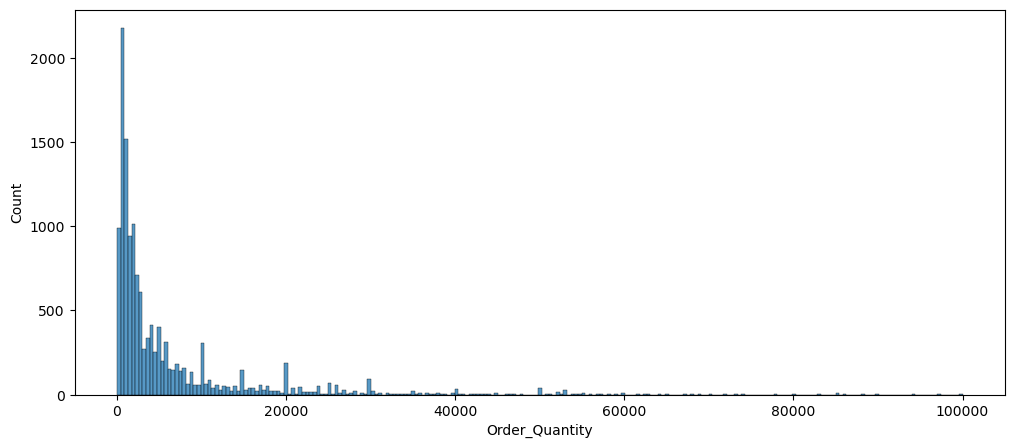

In [27]:
plt.figure(figsize=(12,5))
sns.histplot(data = df_filtered , x='Order_Quantity')
plt.show()

1. The majority of the orders have relatively small quantities.

2. A smaller number of orders have significantly higher quantities, which is causing the skew.

3. This kind of distribution is common in business data, where most transactions are smaller, but a few large transactions (or outliers) account for a large portion of the total volume.

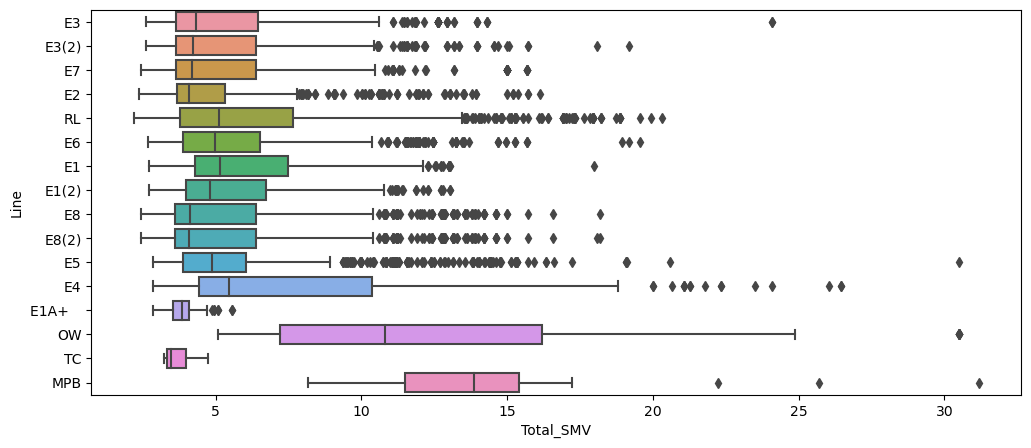

In [28]:
plt.figure(figsize=(12,5))
sns.boxplot(data = df_filtered , x='Total_SMV' , y='Line')
plt.show()

**Big boxes** with many outliers suggest wide variation in tasks or inefficiencies in certain parts of the process.

**Small boxes** with many outliers imply that the line generally handles consistent tasks, but the outliers represent unique challenges or bottlenecks.

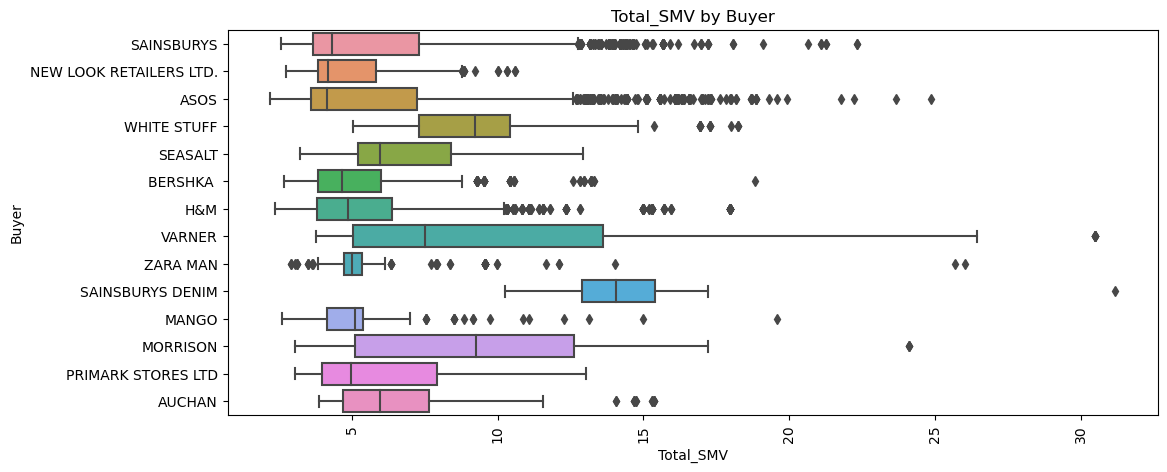

In [29]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df_filtered, x='Total_SMV', y='Buyer')
plt.title('Total_SMV by Buyer')
plt.xticks(rotation=90)
plt.show()

In [30]:
sum_production = df_filtered.groupby('Buyer')['Total_Production_Quantity'].sum().reset_index()
sum_production.head(20)

Buyer  Total_Production_Quantity
0                      ASOS                    5084816
1                    AUCHAN                    1238644
2                  BERSHKA                     6400474
3                       H&M                   18208871
4                     MANGO                    5709756
5                  MORRISON                     446904
6   NEW LOOK RETAILERS LTD.                    3144269
7        PRIMARK STORES LTD                    4640454
8                SAINSBURYS                    9042708
9          SAINSBURYS DENIM                     708270
10                  SEASALT                     408244
11                   VARNER                    2974428
12              WHITE STUFF                     785145
13                 ZARA MAN                    2704310

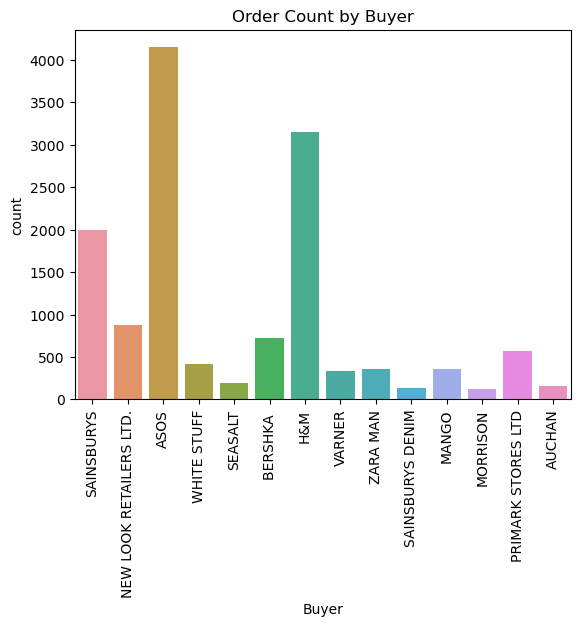

In [31]:
sns.countplot(data=df_filtered, x='Buyer')
plt.title('Order Count by Buyer')
plt.xticks(rotation=90)
plt.show()

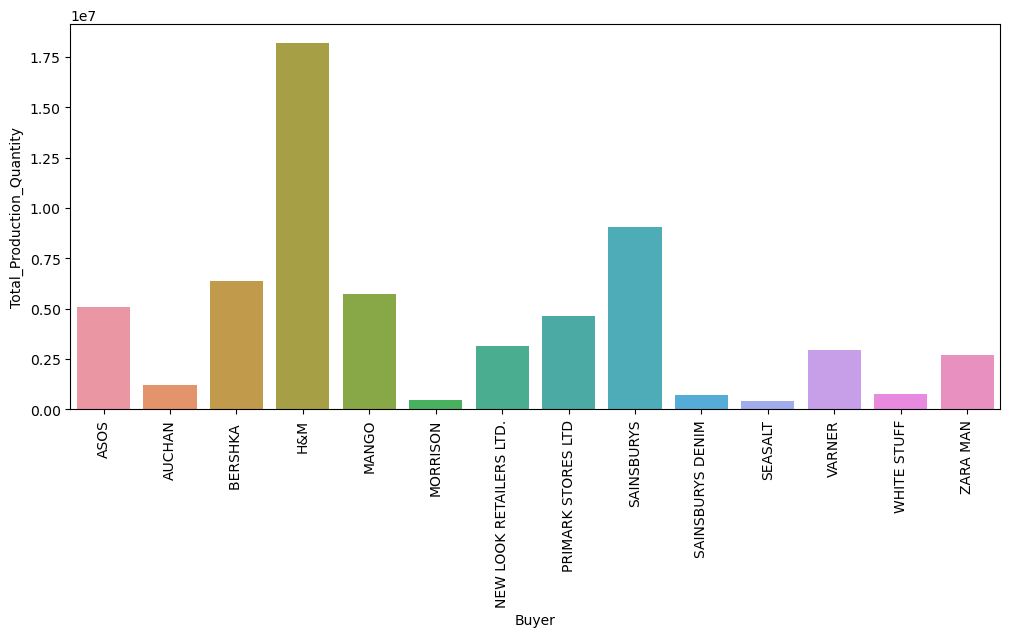

In [32]:
plt.figure(figsize=(12,5))
sns.barplot(data=sum_production , x='Buyer' , y='Total_Production_Quantity')
plt.xticks(rotation=90)
plt.show()

In [33]:
sum_production_line = df_filtered.groupby('Line')['Total_Production_Quantity'].sum().reset_index()
sum_production_line.head(20)

Line  Total_Production_Quantity
0        E1                    4479339
1     E1(2)                    4685799
2   E1A+                        555259
3        E2                    6386309
4        E3                    4608766
5     E3(2)                    4706536
6        E4                    5022087
7        E5                    5462214
8        E6                    6089219
9        E7                    6518093
10       E8                    4767466
11    E8(2)                    4823728
12      MPB                    1029658
13       OW                     146648
14       RL                    2096585
15       TC                     119587

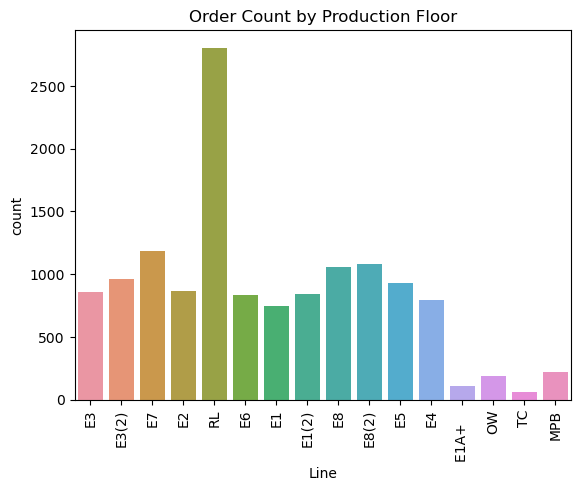

In [34]:
sns.countplot(data=df_filtered, x='Line')
plt.title('Order Count by Production Floor')
plt.xticks(rotation=90)
plt.show()

Robot line shows a taller bar compared to others, it means that

1. Specialization: This line may specialize in specific types of orders or layouts that are more common.
2. Shift Management: If shifts are not distributed evenly, more layouts might occur on one line during peak shifts.

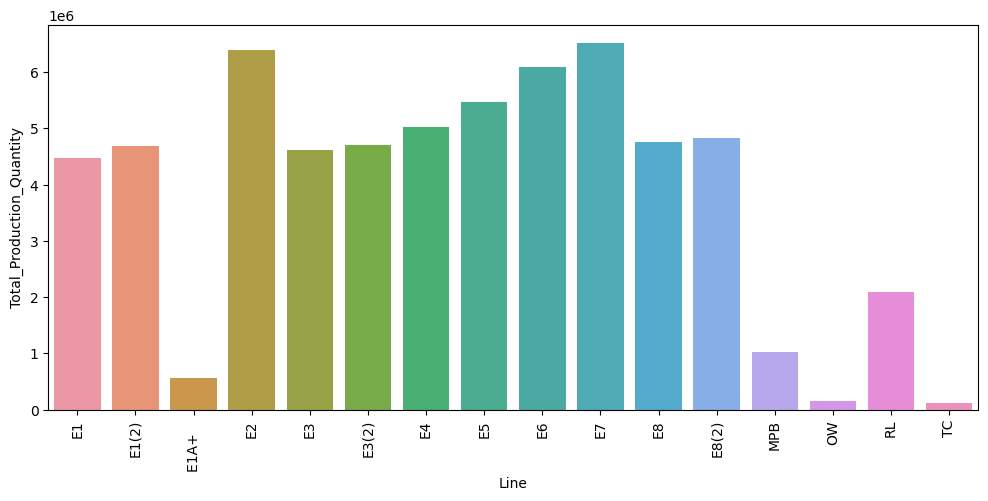

In [35]:
plt.figure(figsize=(12,5))
sns.barplot(data=sum_production_line , x='Line' , y='Total_Production_Quantity')
plt.xticks(rotation=90)
plt.show()

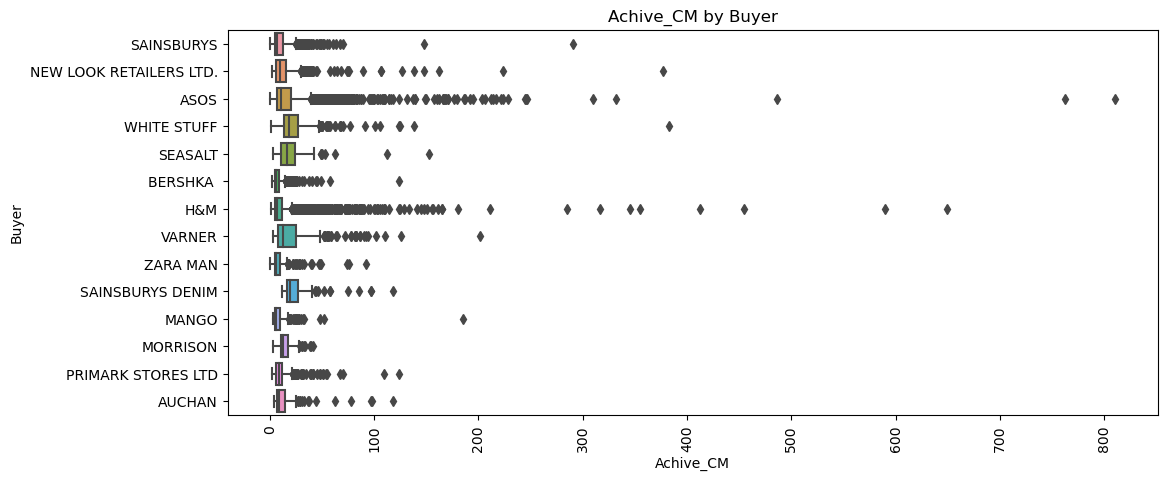

In [36]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df_filtered, x='Achive_CM', y='Buyer')
plt.title('Achive_CM by Buyer')
plt.xticks(rotation=90)
plt.show()

1. The majority of the buyers have a similar Achive_CM value within the 20 range.

2. The outliers (with values around 800) are extreme and need to be investigated. They could represent data entry errors, rare events, or specific buyers with very high production costs.

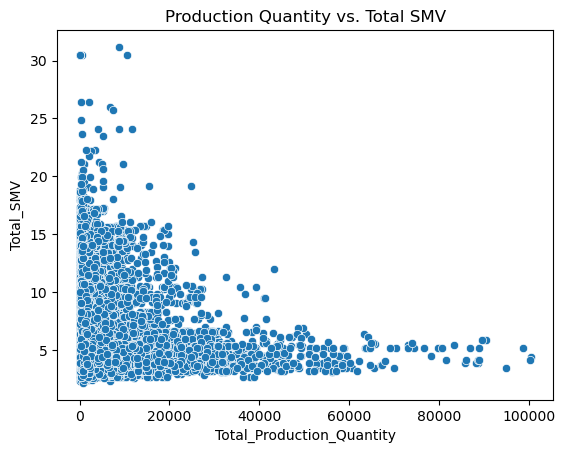

In [37]:
sns.scatterplot(data=df_filtered, x='Total_Production_Quantity', y='Total_SMV')
plt.title('Production Quantity vs. Total SMV')
plt.show()

1. Efficiency in Production: Larger orders generally seem to be more efficient, as indicated by lower SMV values for high production quantities. This could be due to economies of scale, where producing more units results in lower time costs per unit.

2. Complex or Custom Orders: The smaller orders with higher SMVs might represent custom, specialized, or labor-intensive tasks that require more time per unit to complete.

3. Potential Anomalies: Some points may represent outliers or special cases (e.g., an unusually complex order), so it could be helpful to investigate those specific data points further.

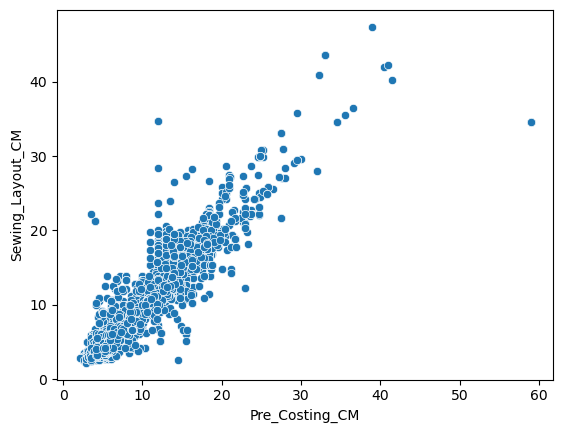

In [38]:
sns.scatterplot(data=df_filtered, x='Pre_Costing_CM', y='Sewing_Layout_CM')

plt.show()

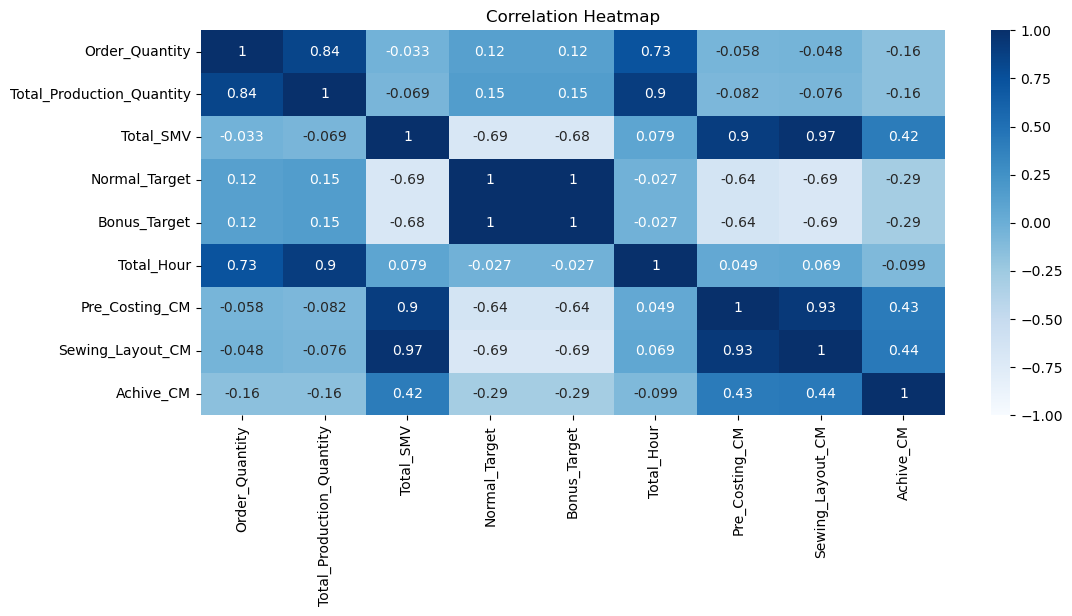

In [39]:
plt.figure(figsize=(12,5))
sns.heatmap(df_filtered.corr(), annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

1. Order Quantity and Production Quantity (0.84):

This high correlation suggests that as the Order_Quantity increases, the Total_Production_Quantity also tends to increase. This is expected since production quantity is directly driven by the size of the orders placed.

2. Order Quantity and Total Hours (0.73):

A strong correlation between Order_Quantity and Total_Hour indicates that larger orders require more total hours of labor to complete, which is logical for manufacturing processes.

3. Production Quantity and Total Hours (0.9):

The very high correlation suggests that the more items you produce (Total_Production_Quantity), the more hours are required (Total_Hour). This shows the linear relationship between the output and time, possibly influenced by the production rate and operational efficiency.

4. Total SMV and Pre-Costing CM (0.9):

The strong correlation between Total_SMV and Pre_Costing_CM indicates that the cost of making (CM) is closely related to the labor time required (Total_SMV). Higher SMV likely results in higher production costs due to more labor time needed.

5. Total SMV and Sewing Layout CM (0.97):

This almost perfect correlation suggests that the Sewing_Layout_CM is heavily dependent on Total_SMV. In other words, the cost of the sewing layout is strongly influenced by the time required to complete it.

6. Sewing Layout CM and Pre-Costing CM (0.93):

The high correlation shows that these two cost metrics are closely related. Since both are derived from production and labor costs, this makes sense.

**Actionable Insights:**

1. Process Optimization: Given the strong correlation between production time and output, optimizing time management or enhancing production efficiency could significantly reduce costs.

2. Review Achieve CM: The moderate correlation of Achieve_CM with the other cost-related variables suggests potential gaps between expected and actual performance. Investigating these deviations could uncover inefficiencies in the production process.

# Feature Engineering

In [40]:
df_filtered['Actual_Production_Per_Hour'] = df_filtered['Total_Production_Quantity'] / df_filtered['Total_Hour']

1. For analysis, these metrics give a deeper understanding of production performance, helping to identify inefficiencies or areas for improvement.

2. For machine learning, they serve as important features that could improve the predictive power of models.

In [41]:
df_filtered['Actual_Production_Per_Hour'].replace(np.inf, np.nan, inplace=True)

In [42]:
df_filtered = df_filtered.dropna()

In [43]:
df_filtered['Actual_Production_Per_Hour'].describe()

count    13519.000000
mean       169.585276
std        103.707706
min          2.036660
25%         95.642507
50%        149.769585
75%        224.741034
max       2776.470588
Name: Actual_Production_Per_Hour, dtype: float64

In [44]:
df_filtered.head()

Buyer  Order_Quantity   Line  Total_Production_Quantity  Total_SMV  \
0  SAINSBURYS           13000     E3                      13055       2.97   
1  SAINSBURYS             600  E3(2)                        594       2.97   
2  SAINSBURYS            7500     E3                       6800       2.97   
3  SAINSBURYS            9000  E3(2)                       4898       2.97   
4  SAINSBURYS            2600     E3                       2670       2.97   

   Normal_Target  Bonus_Target  Total_Hour  Pre_Costing_CM  Sewing_Layout_CM  \
0            296           355       45.53            4.23              3.00   
1            455           546        3.09            3.51              2.99   
2            296           355       23.62            3.51              3.00   
3            296           355       15.47            3.51              3.00   
4            296           355       12.29            3.51              3.00   

   Achive_CM  Actual_Production_Per_Hour  
0       2.95                  286.734022  
1       6.75                  192.233010  
2       2.94                  287.891617  
3       2.67                  316.612799  
4       3.89                  217.249797

To see if higher efficiency (Actual Production Per Hour) relates to lower costs (CM values). This will show whether more efficient production results in cost savings.

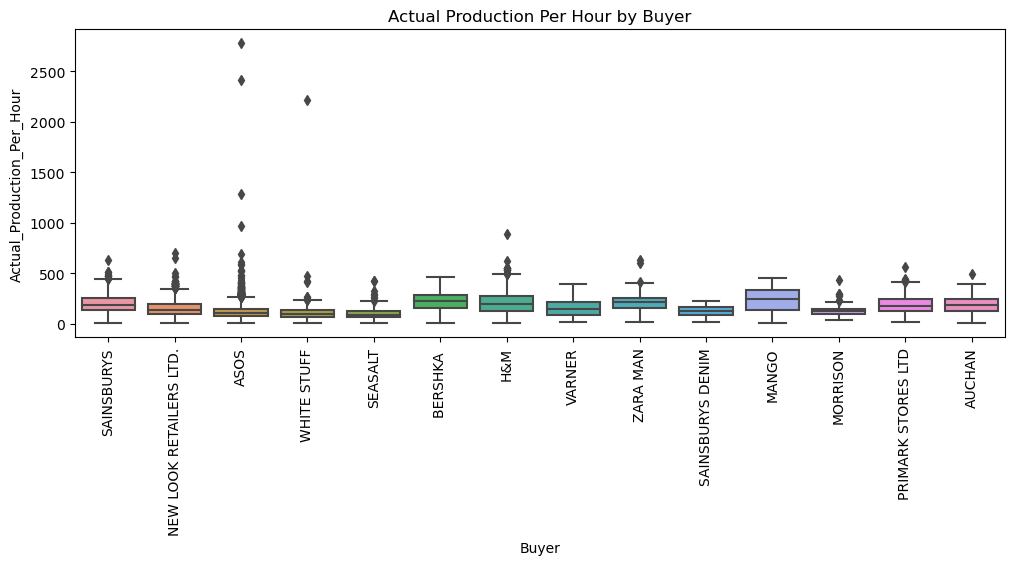

In [45]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df_filtered, x='Buyer', y='Actual_Production_Per_Hour')
plt.title('Actual Production Per Hour by Buyer')
plt.xticks(rotation=90)
plt.show()

1. Outliers:

High Variability: Buyers with outliers ranging from 300 to 2500 in Actual_Production_Per_Hour might be experiencing unusual production scenarios. These outliers could represent special orders, irregularities, or inefficiencies.

Investigate Causes: It's important to investigate why some buyers have such high production rates. This could be due to exceptional orders, high-volume demands, or other specific conditions.

2. Consistency:

Stable Production Rates: Buyers showing consistent production rates between 100 and 250 might be operating under more stable conditions. This suggests a more predictable production environment or consistent order sizes.

Operational Efficiency: Consistent production rates might indicate that these buyers have efficient processes or standardized order sizes.

In [46]:
df_filtered.head()

Buyer  Order_Quantity   Line  Total_Production_Quantity  Total_SMV  \
0  SAINSBURYS           13000     E3                      13055       2.97   
1  SAINSBURYS             600  E3(2)                        594       2.97   
2  SAINSBURYS            7500     E3                       6800       2.97   
3  SAINSBURYS            9000  E3(2)                       4898       2.97   
4  SAINSBURYS            2600     E3                       2670       2.97   

   Normal_Target  Bonus_Target  Total_Hour  Pre_Costing_CM  Sewing_Layout_CM  \
0            296           355       45.53            4.23              3.00   
1            455           546        3.09            3.51              2.99   
2            296           355       23.62            3.51              3.00   
3            296           355       15.47            3.51              3.00   
4            296           355       12.29            3.51              3.00   

   Achive_CM  Actual_Production_Per_Hour  
0       2.95                  286.734022  
1       6.75                  192.233010  
2       2.94                  287.891617  
3       2.67                  316.612799  
4       3.89                  217.249797

# Model Develop

In [47]:
df_filtered['target'] = df_filtered['Sewing_Layout_CM'] - df_filtered['Achive_CM']

In [48]:
df_filtered['new_target'] = (df_filtered['target']>0).astype('int')

In [49]:
df_filtered['new_target'].value_counts()

0    10603
1     2916
Name: new_target, dtype: int64

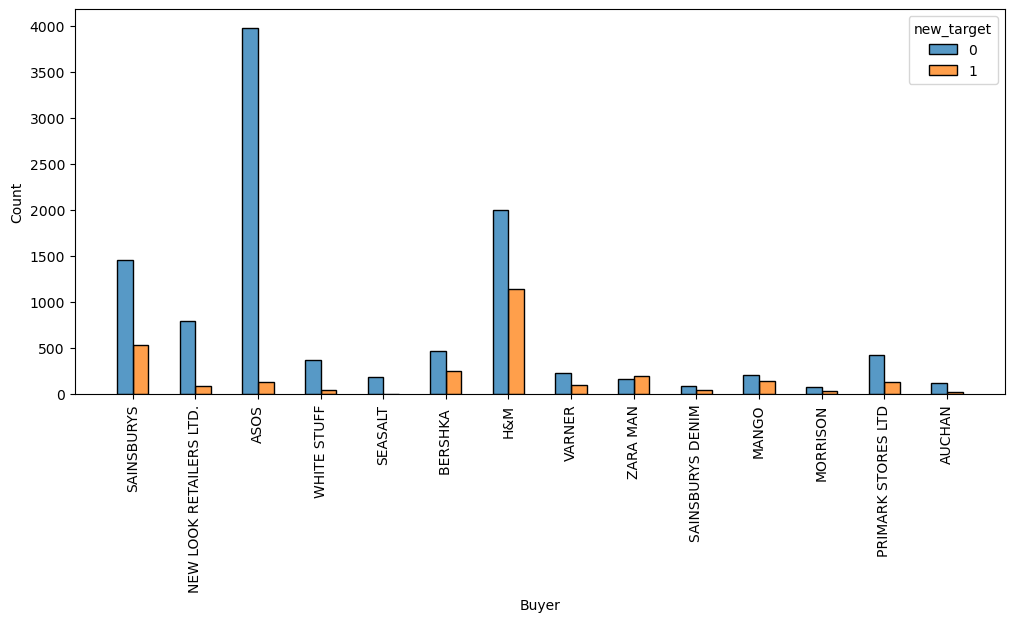

In [50]:
plt.figure(figsize=(12,5))
sns.histplot(data=df_filtered , x='Buyer' , hue='new_target' , multiple='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

Consistent Underperformance: The specific buyer with a high count of 0 (CM not achieved) may need further investigation. There could be operational inefficiencies, more complex orders, or issues with their production processes.

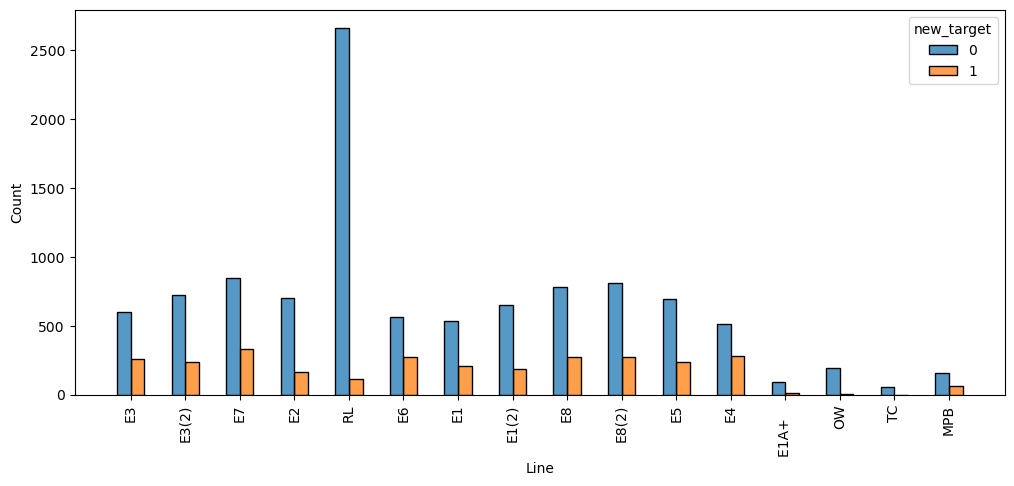

In [51]:
plt.figure(figsize=(12,5))
sns.histplot(data=df_filtered , x='Line' , hue='new_target' , multiple='dodge', shrink=.5)
plt.xticks(rotation=90)
plt.show()

1. Production Inefficiencies: Robot , outer wear  , training center and E1A floor could be less efficient, leading to consistently higher costs (i.e., they are unable to meet the cost targets).

2. Special Cases: These lines might be handling more complex, urgent, or smaller orders that are naturally more expensive, explaining why they are underperforming.

3. Consistent Problems: There could be systematic problems with these lines (e.g., equipment issues, staffing problems, or workflow inefficiencies).

In [52]:
average_production = df_filtered.groupby('Line')['Total_Production_Quantity'].mean().reset_index()

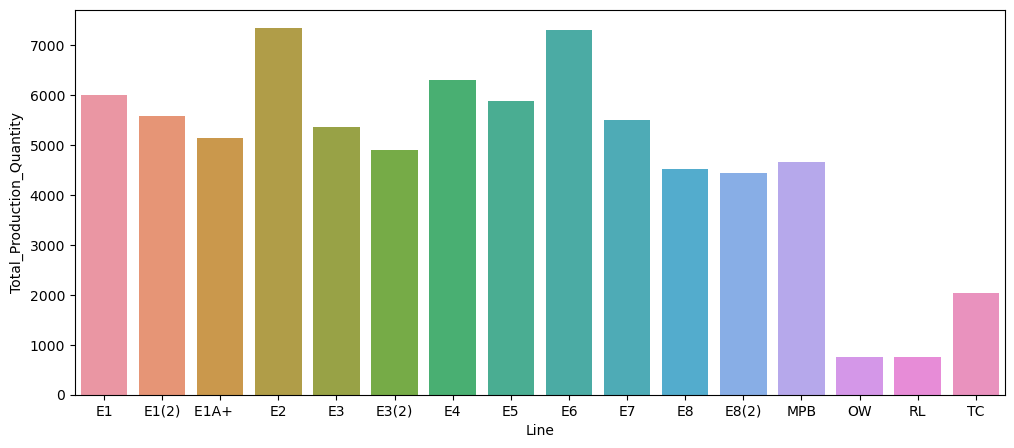

In [53]:
plt.figure(figsize=(12,5))
sns.barplot(data=average_production , x= 'Line' , y='Total_Production_Quantity')
plt.show()

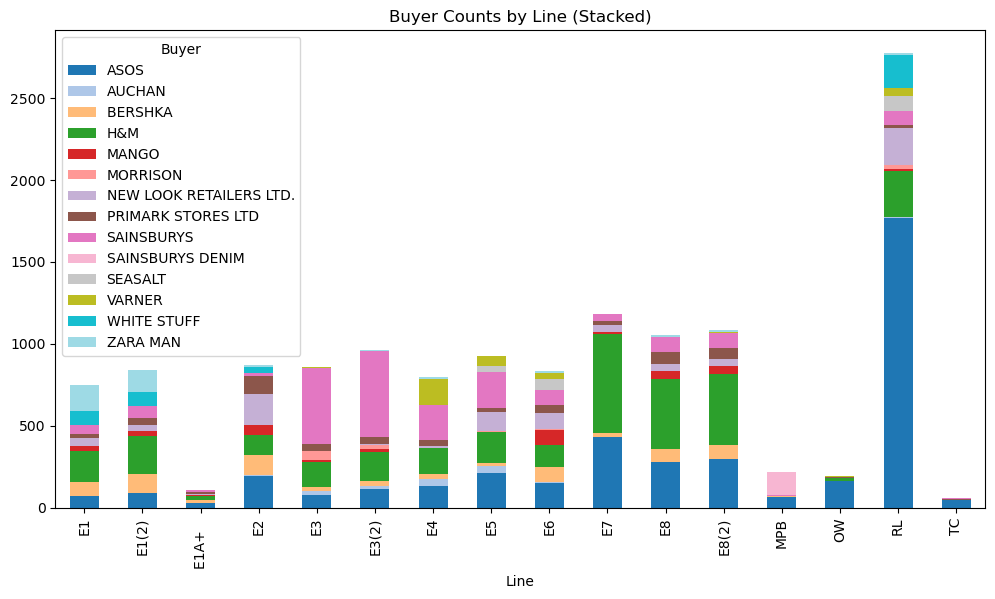

In [54]:
line_counts = df_filtered.groupby(['Line', 'Buyer']).size().reset_index(name='count')

line_counts_pivot = line_counts.pivot(index='Line', columns='Buyer', values='count').fillna(0)

line_counts_pivot.plot(kind='bar', stacked=True, figsize=(12, 6.2), colormap='tab20')


plt.title('Buyer Counts by Line (Stacked)')
plt.xticks(rotation=90)
plt.legend(title='Buyer')
plt.show()


In [55]:
import plotly.express as px

# Grouping the data
line_counts = df_filtered.groupby(['Line', 'Buyer']).size().reset_index(name='count')

# Creating the stacked bar chart
fig = px.bar(line_counts, 
             x='Line', 
             y='count',  # Set y to count
             color='Buyer',  # Color by Buyer for distinct representation
             text='count', 
             title='Buyer Counts by Line (Stacked)',
             color_discrete_sequence=px.colors.qualitative.Set3)  # Use a categorical colormap

# Updating the layout
fig.update_layout(barmode='stack', xaxis_title='Line', yaxis_title='Count', xaxis_tickangle=-45)

# Show the plot
fig.show()


The **E2 floor** underperformed compared to other floors, despite having higher production (Average 7340 pcs) quantities, indicating the need for further investigation.

**Convert data catogorical to numeric**

In [56]:
model_df = df_filtered.copy()

In [57]:
model_df = model_df.drop('target' , axis = 1)

In [58]:
model_df = pd.get_dummies(model_df)

In [59]:
pd.set_option('display.max_columns',None)
model_df.head()

Order_Quantity  Total_Production_Quantity  Total_SMV  Normal_Target  \
0           13000                      13055       2.97            296   
1             600                        594       2.97            455   
2            7500                       6800       2.97            296   
3            9000                       4898       2.97            296   
4            2600                       2670       2.97            296   

   Bonus_Target  Total_Hour  Pre_Costing_CM  Sewing_Layout_CM  Achive_CM  \
0           355       45.53            4.23              3.00       2.95   
1           546        3.09            3.51              2.99       6.75   
2           355       23.62            3.51              3.00       2.94   
3           355       15.47            3.51              3.00       2.67   
4           355       12.29            3.51              3.00       3.89   

   Actual_Production_Per_Hour  new_target  Buyer_ASOS  Buyer_AUCHAN  \
0                  286.734022           1           0             0   
1                  192.233010           0           0             0   
2                  287.891617           1           0             0   
3                  316.612799           1           0             0   
4                  217.249797           0           0             0   

   Buyer_BERSHKA   Buyer_H&M  Buyer_MANGO  Buyer_MORRISON  \
0               0          0            0               0   
1               0          0            0               0   
2               0          0            0               0   
3               0          0            0               0   
4               0          0            0               0   

   Buyer_NEW LOOK RETAILERS LTD.  Buyer_PRIMARK STORES LTD  Buyer_SAINSBURYS  \
0                              0                         0                 1   
1                              0                         0                 1   
2                              0                         0                 1   
3                              0                         0                 1   
4                              0                         0                 1   

   Buyer_SAINSBURYS DENIM  Buyer_SEASALT  Buyer_VARNER  Buyer_WHITE STUFF  \
0                       0              0             0                  0   
1                       0              0             0                  0   
2                       0              0             0                  0   
3                       0              0             0                  0   
4                       0              0             0                  0   

   Buyer_ZARA MAN  Line_E1  Line_E1(2)  Line_E1A+     Line_E2  Line_E3  \
0               0        0           0             0        0        1   
1               0        0           0             0        0        0   
2               0        0           0             0        0        1   
3               0        0           0             0        0        0   
4               0        0           0             0        0        1   

   Line_E3(2)  Line_E4  Line_E5  Line_E6  Line_E7  Line_E8  Line_E8(2)  \
0           0        0        0        0        0        0           0   
1           1        0        0        0        0        0           0   
2           0        0        0        0        0        0           0   
3           1        0        0        0        0        0           0   
4           0        0        0        0        0        0           0   

   Line_MPB  Line_OW  Line_RL  Line_TC  
0         0        0        0        0  
1         0        0        0        0  
2         0        0        0        0  
3         0        0        0        0  
4         0        0        0        0

In [60]:
from sklearn.model_selection import train_test_split , GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

import pickle

**Random Forest**

In [61]:
X = model_df.drop('new_target' , axis=1)
y = model_df['new_target']

In [62]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size =.25 , random_state= 0 , stratify = y)

In [63]:
rf = RandomForestClassifier(random_state = 0)

cv_params = {'max_depth':[3,5,None],
            'max_features':[1.0],
            'max_samples': [0.7, 1.0],
            'n_estimators':[300,500],
            'min_samples_split':[2,3,4],
            'min_samples_leaf':[1,2,3]}

scoring = {'accuracy' , 'precision' , 'recall' , 'f1'}

rf1 = GridSearchCV(rf , cv_params , scoring = scoring , cv =4 , refit='recall')


In [64]:
%%time
#rf1.fit(X_train , y_train)

CPU times: total: 0 ns
Wall time: 0 ns


In [65]:
path = 'D:/3/0 Data Analyst/0/Data/'

def model_write(path , model_object , save_as):
    with open(path + save_as +'.pickle' , 'wb') as to_write:
        pickle.dump(model_object , to_write)
        
def model_read(path , save_model_name):
    with open(path+save_model_name +'.pickle' , 'rb') as to_read:
        model = pickle.load(to_read)
        
    return model

#model_write(path , rf1 , 'echo')
rf1 = model_read(path , 'echo')

In [66]:
rf1.best_score_

0.9817109307511501

In [67]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [68]:
def make_results(model_name , model_object , metric):
    metric_dict = {'accuracy':'mean_test_accuracy',
                  'precision':'mean_test_precision',
                  'recall':'mean_test_recall',
                  'f1':'mean_test_f1'}
    
    cv_result = pd.DataFrame(model_object.cv_results_)
    best_estimators_result = cv_result.iloc[cv_result[metric_dict[metric]].idxmax(),:]
    
    accuracy= best_estimators_result.mean_test_accuracy
    precision= best_estimators_result.mean_test_precision
    recall= best_estimators_result.mean_test_recall
    f1= best_estimators_result.mean_test_f1
    
    table = pd.DataFrame()
    new_data = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                        })
    
    table = pd.concat([table , new_data] ,ignore_index =True )
  
    return table  

In [69]:
make_results('Random Forest cv' , rf1 , 'recall')

model  precision    recall        F1  accuracy
0  Random Forest cv   0.989449  0.981711  0.985549  0.993786

In [70]:
def get_score(model_name , model , X_test_data , y_test_data):
    
    preds = model.best_estimator_.predict(X_test_data)
    
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                         })
                         
    return table

In [71]:
get_score('random_forest test' , rf1 , X_test , y_test)

model  precision    recall       F1  accuracy
0  random_forest test   0.986245  0.983539  0.98489  0.993491

In [72]:
def conf_matrix_plot(model, x_data, y_data):

    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot()
    plt.show()

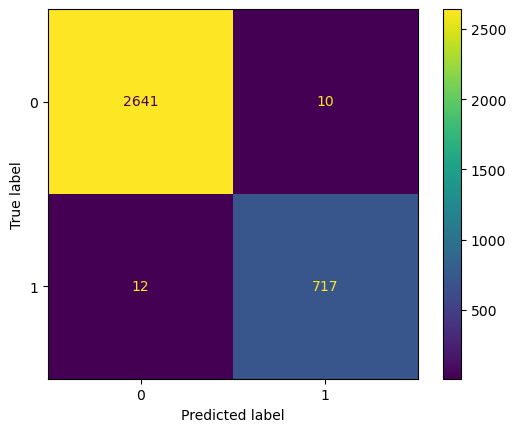

In [73]:
conf_matrix_plot(rf1, X_test, y_test)

The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, you can be more confident that your model's performance on this data is representative of how it will perform on new, unseen data.

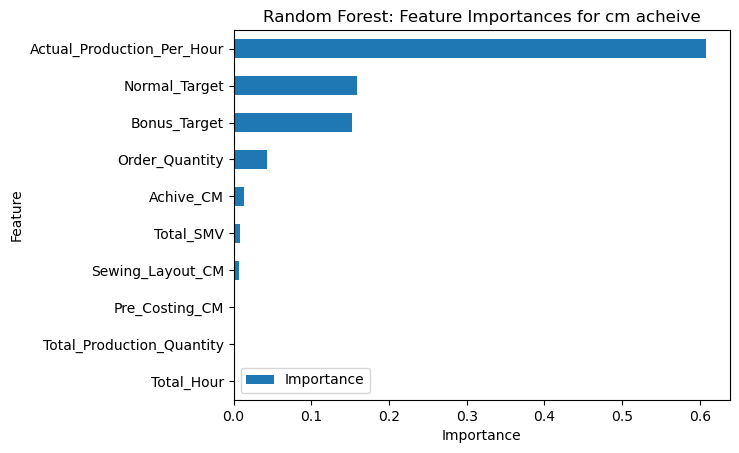

In [74]:
feat_impt = rf1.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for cm acheive", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

**Interpretation of the Results:**

1. Actual Production Per Hour: Highlight that improving actual production rates will have the biggest impact on reducing costs and achieving CM targets. This metric should be monitored closely across all lines and buyers.

2. Targets (Normal and Bonus): While the targets are important in setting expectations, real outcomes are primarily driven by how efficiently lines meet or exceed these targets in actual production. It suggests that more focus should be placed on optimizing real-time production efficiency rather than just setting higher targets.

**Actionable Recommendations:**

Optimize Production Efficiency: Since actual production per hour is the key factor, management should:

1. Identify and address bottlenecks on lines with low production per hour.
2. Provide training, resources, or incentives to improve production efficiency.
3. Analyze the four floor where CM is never achieved to diagnose operational problems and implement improvements.



In [75]:
xgb = XGBClassifier(objective = 'binary:logistic' , random_state = 0)

cv_params = {'max_depth': [3,5],
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [300,500],
             }   

scoring = {'accuracy', 'precision', 'recall', 'f1'}

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

In [76]:
%%time
#xgb_cv.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


In [77]:
#model_write(path , xgb_cv , 'echo1')
xgb_cv = model_read(path , 'echo1')

In [78]:
xgb_cv.best_score_

0.9883631118422098

In [79]:
make_results('xgb cv' , xgb_cv , 'recall')

model  precision   recall        F1  accuracy
0  xgb cv   0.986802  0.98994  0.988363   0.99497

In [80]:
get_score('xgb test' , xgb_cv , X_test , y_test)

model  precision    recall        F1  accuracy
0  xgb test   0.987586  0.982167  0.984869  0.993491

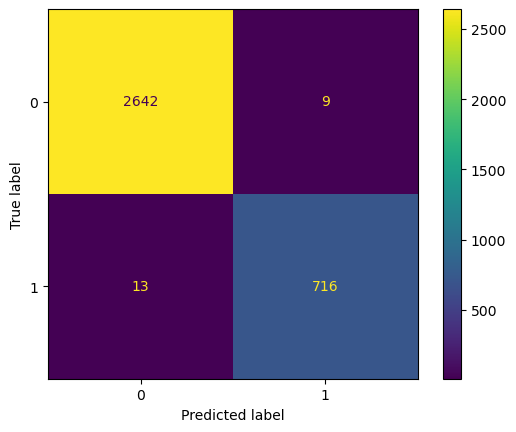

In [81]:
conf_matrix_plot(xgb_cv, X_test, y_test)

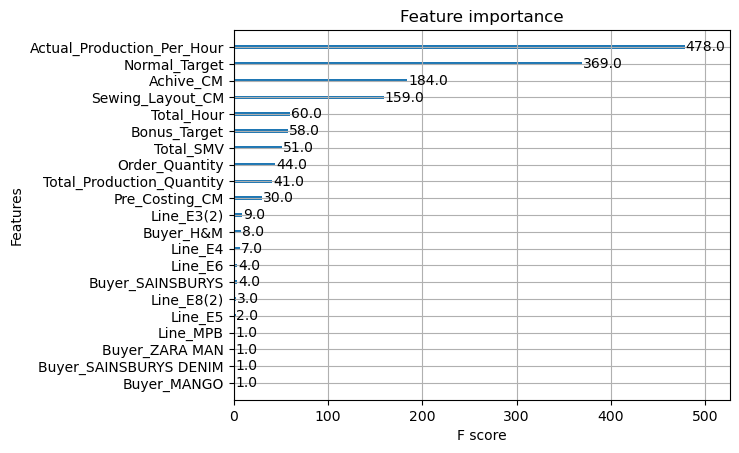

In [82]:
plot_importance(xgb_cv.best_estimator_);

This tells us that the two most important features used by our model were Actual production per hour, normal target. This is very useful information. In a full project, we'd go back and examine these features very closely to understand how and why they are affecting acheiveing cm.

# Dropping robot line for General analysis

In [83]:
model_df_new = df_filtered.copy()

In [84]:
model_df_new.shape

(13519, 14)

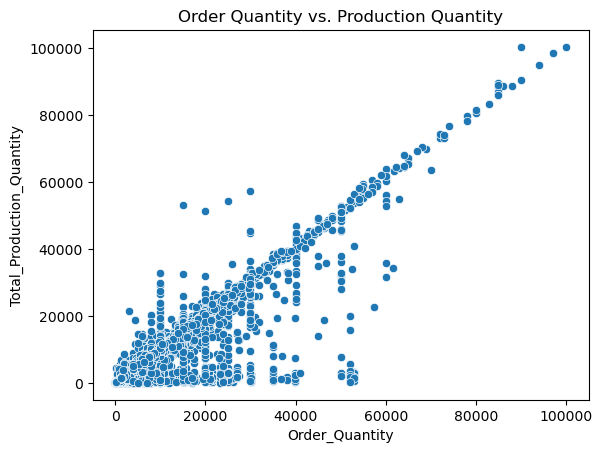

In [85]:
sns.scatterplot(data=model_df_new, x='Order_Quantity', y='Total_Production_Quantity')
plt.title('Order Quantity vs. Production Quantity')
plt.show()

depict shows that almost linear relationship between order qty and production qty

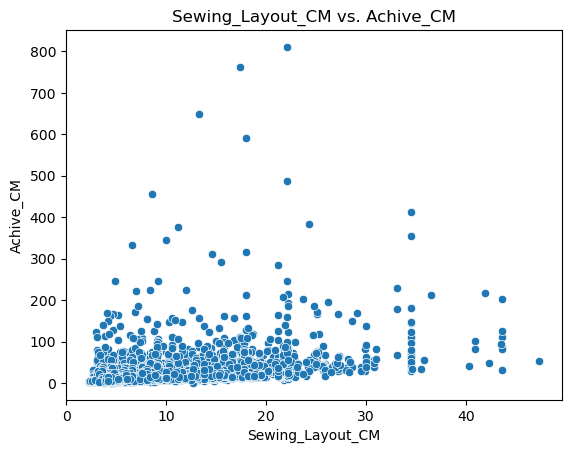

In [86]:
sns.scatterplot(data=model_df_new, x='Sewing_Layout_CM', y='Achive_CM')
plt.title('Sewing_Layout_CM vs. Achive_CM')
plt.show()

depict shows that no relationship between Sewing_Layout_CM and Achive_CM which is alarming. management should investigate in this issue

In [87]:
model_df_new = model_df_new[model_df_new['Line']!='RL']

In [88]:
model_df_new = model_df_new.drop(['target' , 'Sewing_Layout_CM' , 'Achive_CM'] , axis=1)

In [89]:
model_df_new = pd.get_dummies(model_df_new)

In [90]:
model_df_new.head()

Order_Quantity  Total_Production_Quantity  Total_SMV  Normal_Target  \
0           13000                      13055       2.97            296   
1             600                        594       2.97            455   
2            7500                       6800       2.97            296   
3            9000                       4898       2.97            296   
4            2600                       2670       2.97            296   

   Bonus_Target  Total_Hour  Pre_Costing_CM  Actual_Production_Per_Hour  \
0           355       45.53            4.23                  286.734022   
1           546        3.09            3.51                  192.233010   
2           355       23.62            3.51                  287.891617   
3           355       15.47            3.51                  316.612799   
4           355       12.29            3.51                  217.249797   

   new_target  Buyer_ASOS  Buyer_AUCHAN  Buyer_BERSHKA   Buyer_H&M  \
0           1           0             0               0          0   
1           0           0             0               0          0   
2           1           0             0               0          0   
3           1           0             0               0          0   
4           0           0             0               0          0   

   Buyer_MANGO  Buyer_MORRISON  Buyer_NEW LOOK RETAILERS LTD.  \
0            0               0                              0   
1            0               0                              0   
2            0               0                              0   
3            0               0                              0   
4            0               0                              0   

   Buyer_PRIMARK STORES LTD  Buyer_SAINSBURYS  Buyer_SAINSBURYS DENIM  \
0                         0                 1                       0   
1                         0                 1                       0   
2                         0                 1                       0   
3                         0                 1                       0   
4                         0                 1                       0   

   Buyer_SEASALT  Buyer_VARNER  Buyer_WHITE STUFF  Buyer_ZARA MAN  Line_E1  \
0              0             0                  0               0        0   
1              0             0                  0               0        0   
2              0             0                  0               0        0   
3              0             0                  0               0        0   
4              0             0                  0               0        0   

   Line_E1(2)  Line_E1A+     Line_E2  Line_E3  Line_E3(2)  Line_E4  Line_E5  \
0           0             0        0        1           0        0        0   
1           0             0        0        0           1        0        0   
2           0             0        0        1           0        0        0   
3           0             0        0        0           1        0        0   
4           0             0        0        1           0        0        0   

   Line_E6  Line_E7  Line_E8  Line_E8(2)  Line_MPB  Line_OW  Line_TC  
0        0        0        0           0         0        0        0  
1        0        0        0           0         0        0        0  
2        0        0        0           0         0        0        0  
3        0        0        0           0         0        0        0  
4        0        0        0           0         0        0        0

In [91]:
model_df_new.shape

(10744, 38)

In [92]:
X = model_df_new.drop('new_target' , axis=1)
y = model_df_new['new_target']

In [93]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size =.25 , random_state= 0 , stratify = y)

In [94]:
rf = RandomForestClassifier(random_state = 0)

cv_params = {'max_depth':[3,5,None],
            'max_features':[1.0],
            'max_samples': [0.7, 1.0],
            'n_estimators':[300,500],
            'min_samples_split':[2,3,4],
            'min_samples_leaf':[1,2,3]}

scoring = {'accuracy' , 'precision' , 'recall' , 'f1'}

rf2 = GridSearchCV(rf , cv_params , scoring = scoring , cv =4 , refit='recall')


In [95]:
%%time
#rf2.fit(X_train , y_train)

CPU times: total: 0 ns
Wall time: 0 ns


In [96]:
#model_write(path , rf2 , 'echo2')
rf2 = model_read(path , 'echo2')

In [97]:
rf2.best_score_

0.9852498642042369

In [98]:
make_results('Random Forest cv new' , rf2 , 'recall')

model  precision   recall        F1  accuracy
0  Random Forest cv new   0.989543  0.98525  0.987374  0.993423

In [99]:
get_score('Random Forest cv new' , rf2 , X_test , y_test)

model  precision    recall        F1  accuracy
0  Random Forest cv new   0.992785  0.981455  0.987088  0.993299

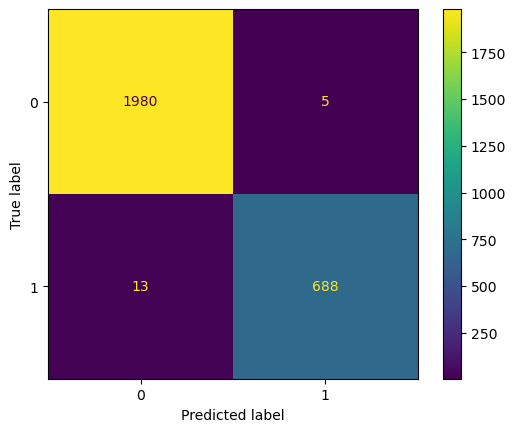

In [100]:
conf_matrix_plot(rf2, X_test, y_test)

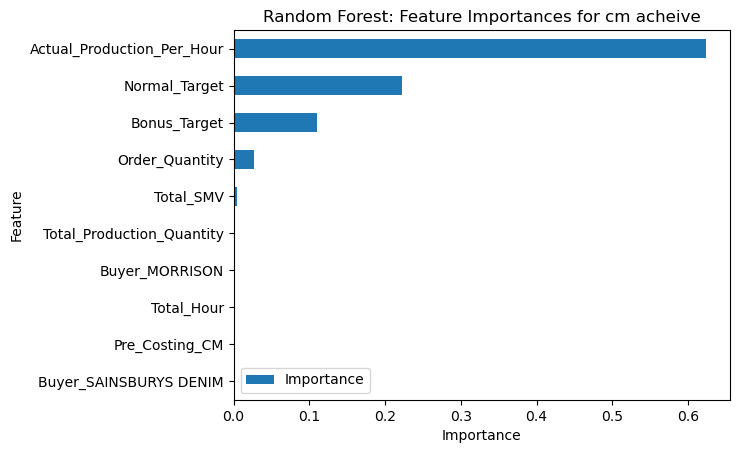

In [101]:
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for cm acheive", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

We recommend implementing real-time monitoring of Actual Production Per Hour compared to the Normal Target Per Hour. The Normal Target is calculated based on the Standard Minute Value (SMV), which represents the standard time required to produce one unit. It is essential to continuously monitor SMV and adjust it if inefficiencies or changes in the production process are identified.

If Actual Production Per Hour falls below the Normal Target, we should investigate the following factors:

- Downtime, including machine breakdowns, delays, or machine setup for new orders
- Bottlenecks in the workflow
- Worker inefficiency or skill gaps
- Switching time between different orders or processes

By closely monitoring SMV and addressing any issues related to downtime, bottlenecks, or worker performance, we can improve production efficiency and ensure that our targets are consistently met.

Formulas:

- Actual Production( Per Hour)= Total Prduction / Total Hour
- Normal Target (pieces per hour) = (60 / SMV) × Number of machines
- SMV = Basic Time + (Basic Time × Allowance %)

Basic Time = (Observed Time × Rating Factor)

Allowances in SMV account for time lost due to personal needs, fatigue, contingencies, and machine-related delays, typically ranging from 5% to 20% of the basic time.



# Investigation E2 floor

In [102]:
df_e2.head()

Buyer Program No Sewing Layout No        Style Name  Order Quantity  \
0  SAINSBURYS      T8641        T8641/270  2PK Leggings new           13000   
1  SAINSBURYS      T8236        T8236/246  2PK Leggings new             600   
2  SAINSBURYS      T8364        T8364/258  2PK Leggings new            7500   
3  SAINSBURYS      T8365        T8365/251  2PK Leggings new            9000   
4  SAINSBURYS      T8365        T8365/250  2PK Leggings new            2600   

       Line  Total Production Quantity  Total SMV  Normal Target  \
0     E3-I2                      13055       2.97            296   
1   E3(2)-B                        594       2.97            455   
2     E3-I2                       6800       2.97            296   
3  E3(2)-I2                       4898       2.97            296   
4     E3-I2                       2670       2.97            296   

   Bonus Target  Total Hour  Pre Costing CM  Sewing Layout CM  Achive CM  
0           355       45.53            4.23              3.00       2.95  
1           546        3.09            3.51              2.99       6.75  
2           355       23.62            3.51              3.00       2.94  
3           355       15.47            3.51              3.00       2.67  
4           355       12.29            3.51              3.00       3.89

In [103]:
df_I2 = df_e2.copy()

In [104]:
df_e2['new_line'] = df_e2['Line'].str.split('-').str[0]

In [105]:
df_e2 = df_e2[df_e2['new_line']=='E2']

In [106]:
df_e2.head()

Buyer Program No Sewing Layout No Style Name  \
25  NEW LOOK RETAILERS LTD.     E23864       E23864/106  NLJT-8727   
26  NEW LOOK RETAILERS LTD.     E23864       E23864/106  NLJT-8727   
27  NEW LOOK RETAILERS LTD.     E22605        E22605/95  NLJT-8727   
28  NEW LOOK RETAILERS LTD.     E22605        E22605/95  NLJT-8727   
29  NEW LOOK RETAILERS LTD.     E22605        E22605/94  NLJT-8727   

    Order Quantity  Line  Total Production Quantity  Total SMV  Normal Target  \
25            9002  E2-B                        133        4.0            370   
26            9002  E2-B                       9175        4.0            370   
27            6200  E2-H                        730        4.8            170   
28            6200  E2-H                       1100        4.8            170   
29            1000  E2-A                        340        4.8            300   

    Bonus Target  Total Hour  Pre Costing CM  Sewing Layout CM  Achive CM  \
25           444        0.53            4.74              4.64       6.52   
26           444       37.99            4.74              4.64       6.77   
27           204        9.23            4.74              5.92      12.12   
28           204       11.68            4.74              5.92      10.18   
29           360        2.48            4.74              5.92      12.34   

   new_line  
25       E2  
26       E2  
27       E2  
28       E2  
29       E2

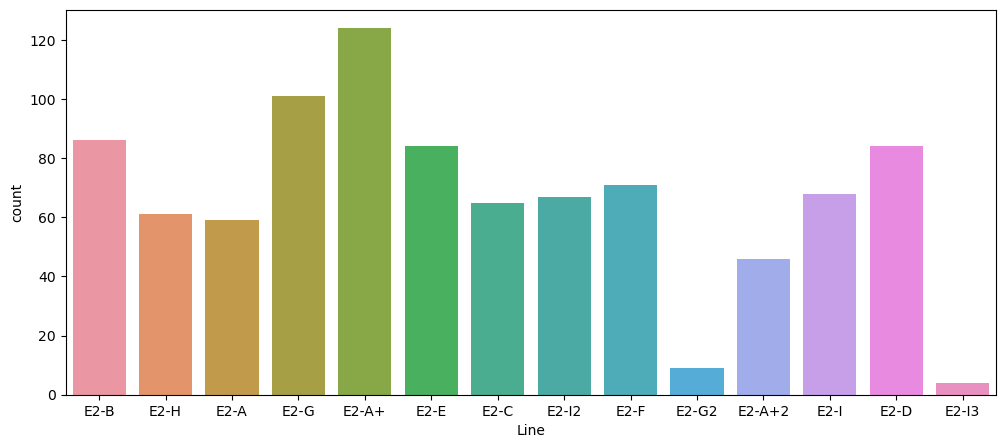

In [107]:
plt.figure(figsize=(12,5))
sns.countplot(data=df_e2 , x='Line' )
plt.show()

In [108]:
E2_production = df_e2.groupby('Line')['Total Production Quantity'].sum().reset_index()

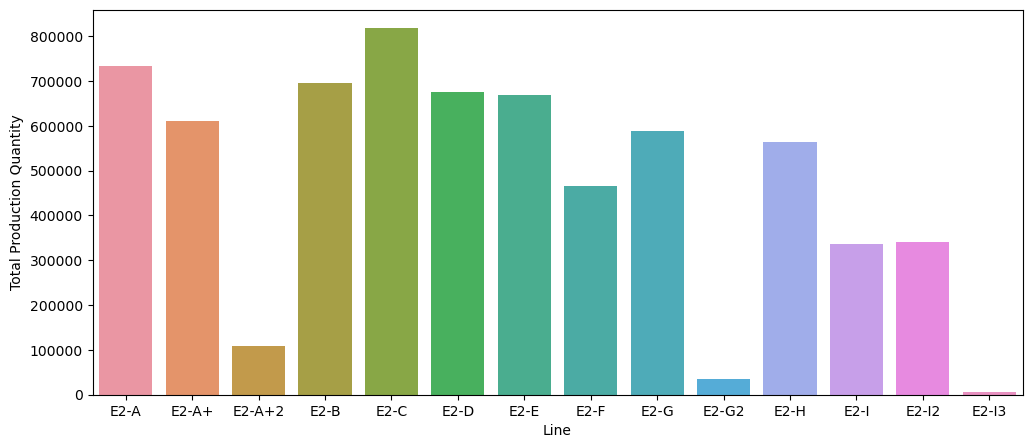

In [109]:
plt.figure(figsize=(12,5))
sns.barplot(data=E2_production , x='Line' , y='Total Production Quantity')
plt.show()

In [110]:
E2_production_avg = df_e2.groupby('Line')['Total Production Quantity'].mean().reset_index()

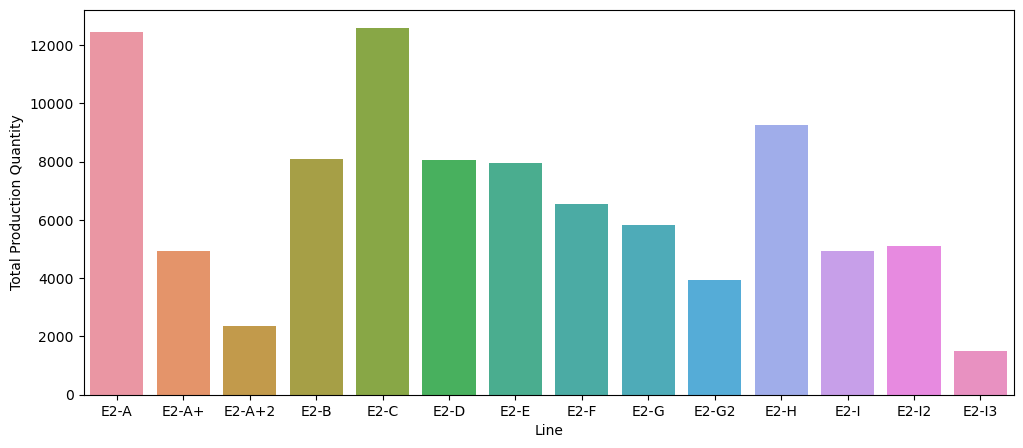

In [111]:
plt.figure(figsize=(12,5))
sns.barplot(data=E2_production_avg , x='Line' , y='Total Production Quantity')
plt.show()

In [112]:
df_e2['Target'] = ((df_e2['Sewing Layout CM'] - df_e2['Achive CM'])>0).astype('int')

In [113]:
df_e2['Target'].value_counts()

0    743
1    186
Name: Target, dtype: int64

In [114]:
df_e2['Target_pre'] = ((df_e2['Pre Costing CM'] - df_e2['Achive CM'])>0).astype('int')

In [115]:
df_e2['Target_pre'].value_counts()

0    703
1    226
Name: Target_pre, dtype: int64

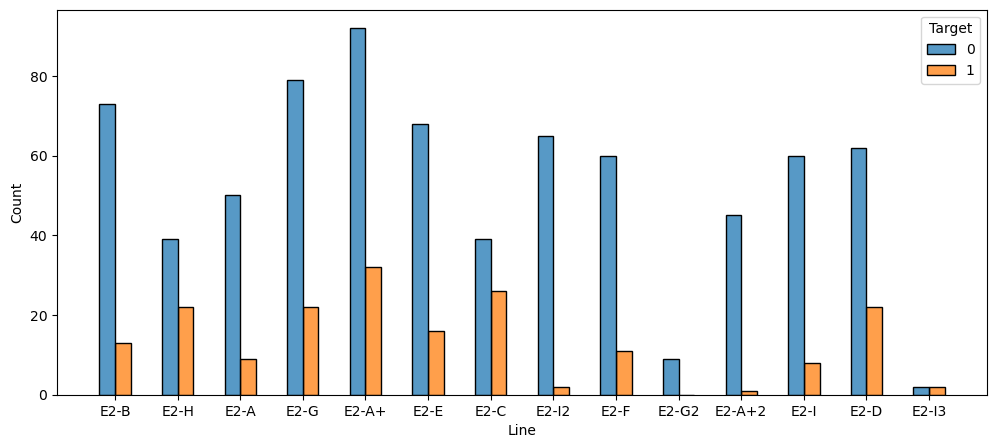

In [116]:
plt.figure(figsize=(12,5))
sns.histplot(data=df_e2 , x='Line' , hue='Target' , multiple='dodge' , shrink=.5)
plt.show()

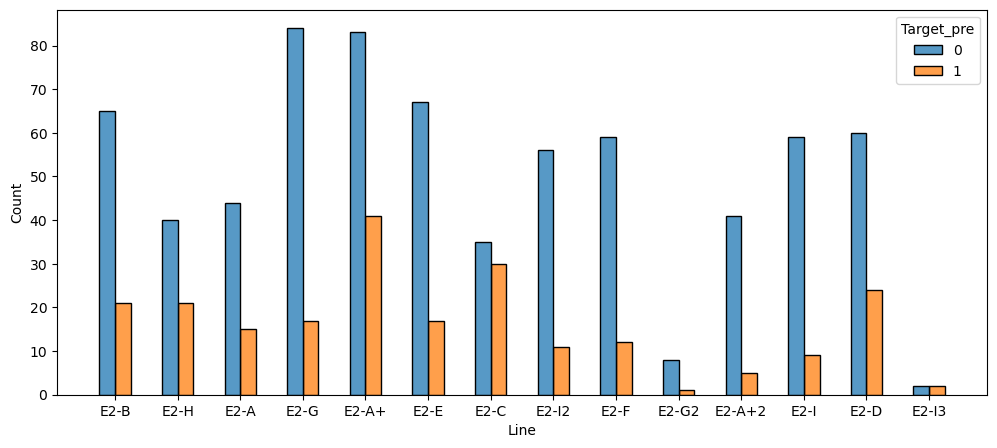

In [117]:
plt.figure(figsize=(12,5))
sns.histplot(data=df_e2 , x='Line' , hue='Target_pre' , multiple='dodge' , shrink=.5)
plt.show()

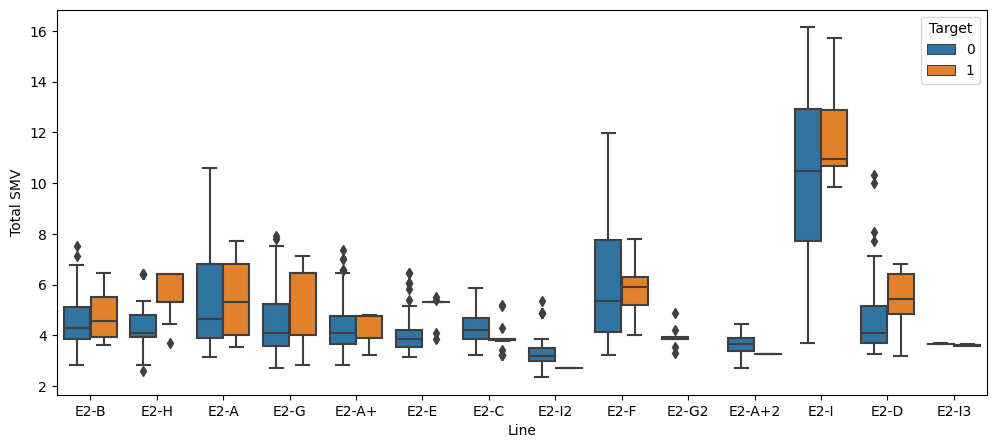

In [118]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df_e2 , x='Line' , y='Total SMV' , hue='Target')
plt.show()

In [119]:
df_e2['Actual production'] = df_e2['Total Production Quantity'] / df_e2['Total Hour']

In [120]:
df_e2.head()

Buyer Program No Sewing Layout No Style Name  \
25  NEW LOOK RETAILERS LTD.     E23864       E23864/106  NLJT-8727   
26  NEW LOOK RETAILERS LTD.     E23864       E23864/106  NLJT-8727   
27  NEW LOOK RETAILERS LTD.     E22605        E22605/95  NLJT-8727   
28  NEW LOOK RETAILERS LTD.     E22605        E22605/95  NLJT-8727   
29  NEW LOOK RETAILERS LTD.     E22605        E22605/94  NLJT-8727   

    Order Quantity  Line  Total Production Quantity  Total SMV  Normal Target  \
25            9002  E2-B                        133        4.0            370   
26            9002  E2-B                       9175        4.0            370   
27            6200  E2-H                        730        4.8            170   
28            6200  E2-H                       1100        4.8            170   
29            1000  E2-A                        340        4.8            300   

    Bonus Target  Total Hour  Pre Costing CM  Sewing Layout CM  Achive CM  \
25           444        0.53            4.74              4.64       6.52   
26           444       37.99            4.74              4.64       6.77   
27           204        9.23            4.74              5.92      12.12   
28           204       11.68            4.74              5.92      10.18   
29           360        2.48            4.74              5.92      12.34   

   new_line  Target  Target_pre  Actual production  
25       E2       0           0         250.943396  
26       E2       0           0         241.510924  
27       E2       0           0          79.089924  
28       E2       0           0          94.178082  
29       E2       0           0         137.096774

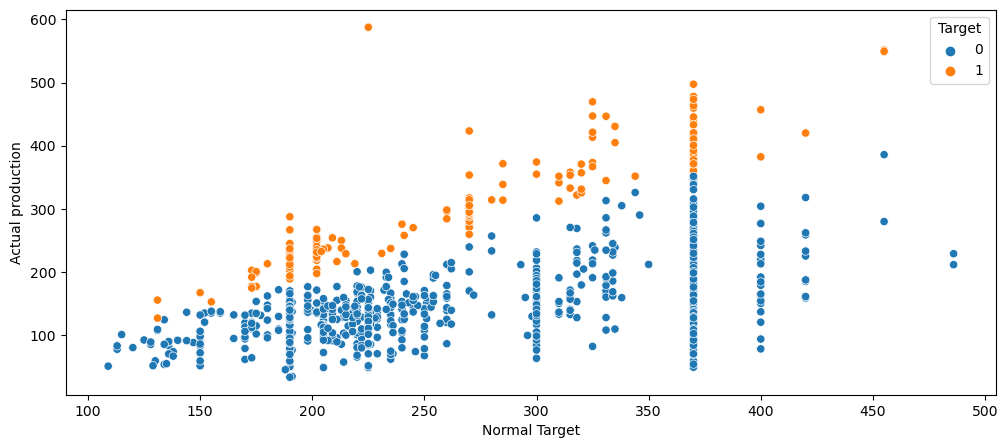

In [121]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_e2 , x='Normal Target' , y='Actual production' ,  hue='Target')
plt.show()

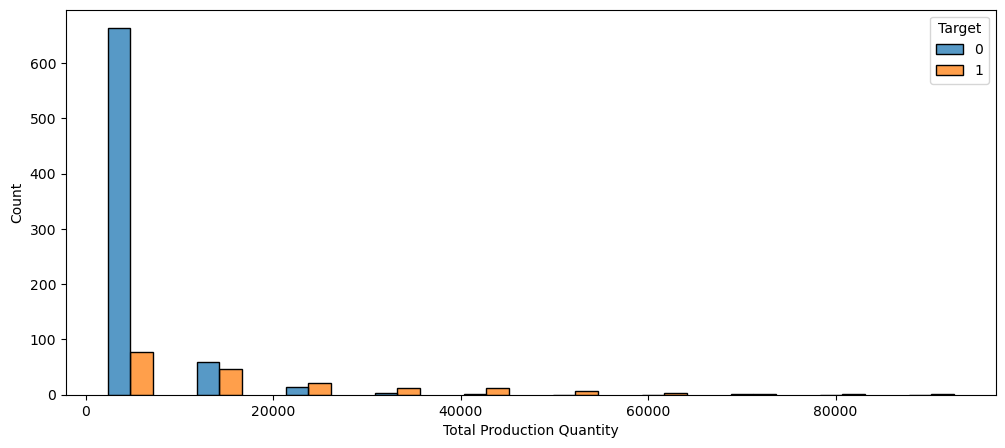

In [122]:
plt.figure(figsize=(12,5))
sns.histplot(data=df_e2 , x='Total Production Quantity' , hue='Target' , multiple='dodge' , shrink=.5 , bins=10)
plt.show()

In [123]:
dddd = df_e2[df_e2['Total Production Quantity']<15000]

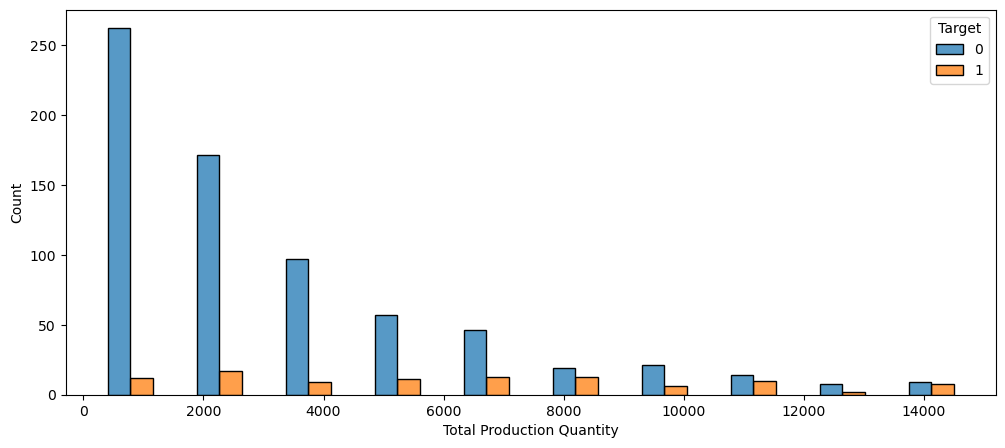

In [124]:
plt.figure(figsize=(12,5))
sns.histplot(data=dddd , x='Total Production Quantity' , hue='Target' , multiple='dodge' , shrink=.5 , bins=10)
plt.show()

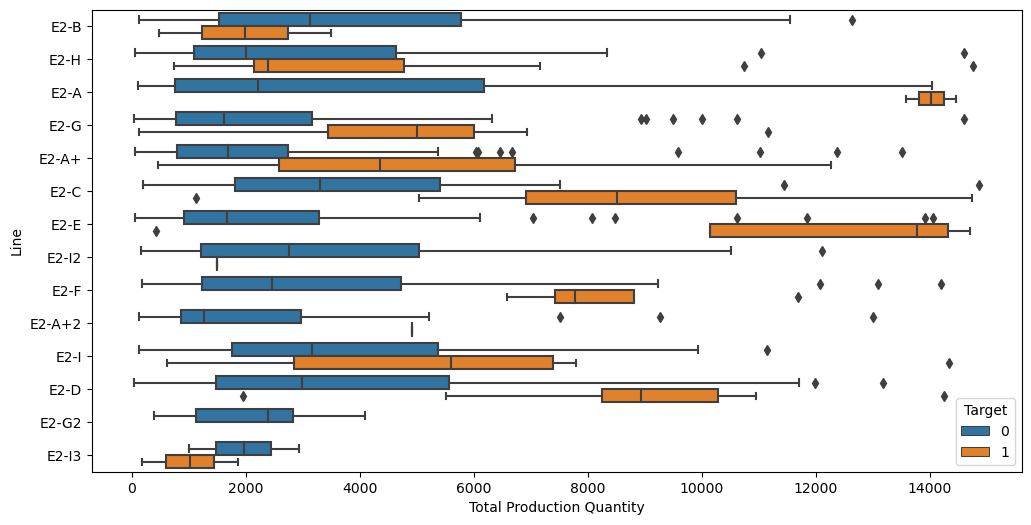

In [125]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dddd , x='Total Production Quantity' , y='Line' , hue='Target')
plt.show()

In [126]:
e2_i2 = dddd[dddd['Line']=='E2-I2']

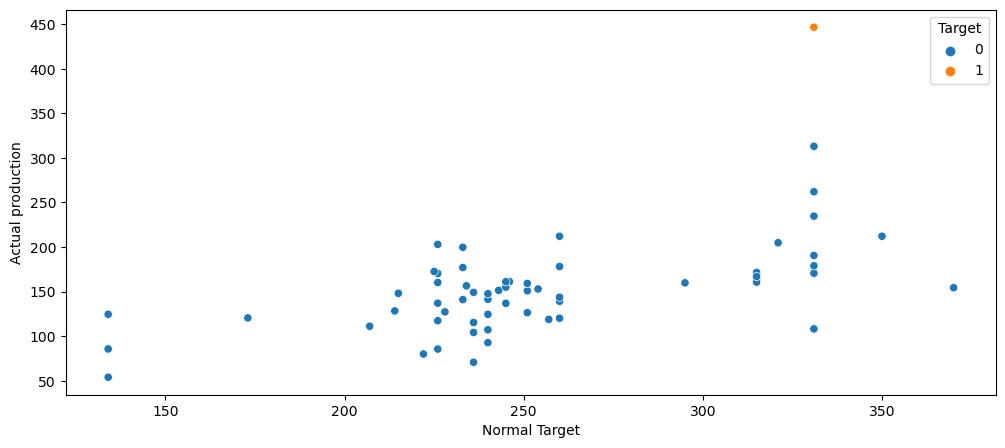

In [127]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=e2_i2 , x='Normal Target' , y='Actual production' ,  hue='Target')
plt.show()

In [128]:
avg_buyer = e2_i2.groupby('Buyer')['Total Production Quantity'].agg(['mean' , 'sum']).reset_index()\
.sort_values(by='sum', ascending=False)

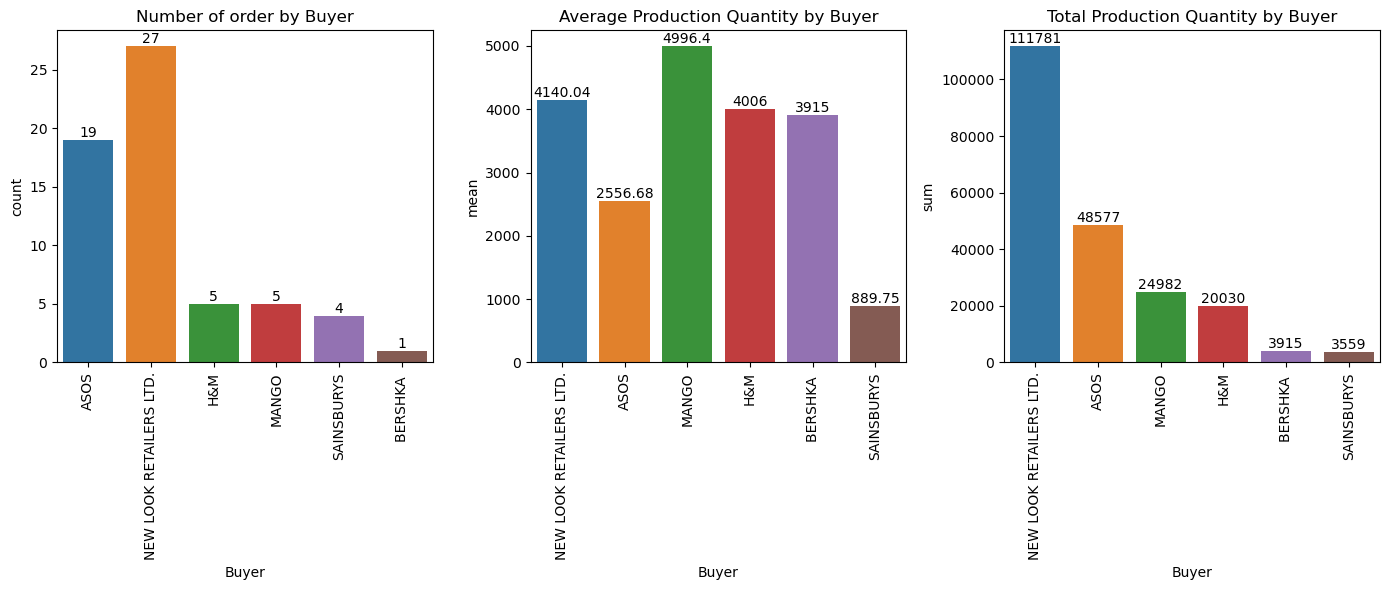

In [129]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6))


z = sns.countplot(data=e2_i2 , x='Buyer' , ax=ax[0])
for container in z.containers:
    z.bar_label(container)
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_title('Number of order by Buyer')

x = sns.barplot(data=avg_buyer, x='Buyer', y='mean', ax=ax[1])
for container in x.containers:
    x.bar_label(container)
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_title('Average Production Quantity by Buyer')

y = sns.barplot(data=avg_buyer, x='Buyer', y='sum', ax=ax[2])
for container in y.containers:
    y.bar_label(container)
ax[2].tick_params(axis='x', rotation=90)
ax[2].set_title('Total Production Quantity by Buyer')


plt.tight_layout()
plt.show()



E2-I2 floor should be seriously investigated

**I2 line investigated**

In [130]:
df_I2.head()

Buyer Program No Sewing Layout No        Style Name  Order Quantity  \
0  SAINSBURYS      T8641        T8641/270  2PK Leggings new           13000   
1  SAINSBURYS      T8236        T8236/246  2PK Leggings new             600   
2  SAINSBURYS      T8364        T8364/258  2PK Leggings new            7500   
3  SAINSBURYS      T8365        T8365/251  2PK Leggings new            9000   
4  SAINSBURYS      T8365        T8365/250  2PK Leggings new            2600   

       Line  Total Production Quantity  Total SMV  Normal Target  \
0     E3-I2                      13055       2.97            296   
1   E3(2)-B                        594       2.97            455   
2     E3-I2                       6800       2.97            296   
3  E3(2)-I2                       4898       2.97            296   
4     E3-I2                       2670       2.97            296   

   Bonus Target  Total Hour  Pre Costing CM  Sewing Layout CM  Achive CM  
0           355       45.53            4.23              3.00       2.95  
1           546        3.09            3.51              2.99       6.75  
2           355       23.62            3.51              3.00       2.94  
3           355       15.47            3.51              3.00       2.67  
4           355       12.29            3.51              3.00       3.89

In [131]:
df_I2['Line_I2'] = df_I2['Line'].str.split('-').str[1]

In [132]:
df_I2['Target'] = ((df_I2['Sewing Layout CM'] - df_I2['Achive CM'])>0).astype('int')

In [133]:
df_I2.head()

Buyer Program No Sewing Layout No        Style Name  Order Quantity  \
0  SAINSBURYS      T8641        T8641/270  2PK Leggings new           13000   
1  SAINSBURYS      T8236        T8236/246  2PK Leggings new             600   
2  SAINSBURYS      T8364        T8364/258  2PK Leggings new            7500   
3  SAINSBURYS      T8365        T8365/251  2PK Leggings new            9000   
4  SAINSBURYS      T8365        T8365/250  2PK Leggings new            2600   

       Line  Total Production Quantity  Total SMV  Normal Target  \
0     E3-I2                      13055       2.97            296   
1   E3(2)-B                        594       2.97            455   
2     E3-I2                       6800       2.97            296   
3  E3(2)-I2                       4898       2.97            296   
4     E3-I2                       2670       2.97            296   

   Bonus Target  Total Hour  Pre Costing CM  Sewing Layout CM  Achive CM  \
0           355       45.53            4.23              3.00       2.95   
1           546        3.09            3.51              2.99       6.75   
2           355       23.62            3.51              3.00       2.94   
3           355       15.47            3.51              3.00       2.67   
4           355       12.29            3.51              3.00       3.89   

  Line_I2  Target  
0      I2       1  
1       B       0  
2      I2       1  
3      I2       1  
4      I2       0

In [134]:
df_I2 = df_I2[df_I2['Line_I2']=='I2']

In [135]:
df_I2.head()

Buyer Program No Sewing Layout No        Style Name  Order Quantity  \
0  SAINSBURYS      T8641        T8641/270  2PK Leggings new           13000   
2  SAINSBURYS      T8364        T8364/258  2PK Leggings new            7500   
3  SAINSBURYS      T8365        T8365/251  2PK Leggings new            9000   
4  SAINSBURYS      T8365        T8365/250  2PK Leggings new            2600   
5  SAINSBURYS      T8166        T8166/232  2PK Leggings new           27500   

       Line  Total Production Quantity  Total SMV  Normal Target  \
0     E3-I2                      13055       2.97            296   
2     E3-I2                       6800       2.97            296   
3  E3(2)-I2                       4898       2.97            296   
4     E3-I2                       2670       2.97            296   
5     E3-I2                       1980       2.97            296   

   Bonus Target  Total Hour  Pre Costing CM  Sewing Layout CM  Achive CM  \
0           355       45.53            4.23               3.0       2.95   
2           355       23.62            3.51               3.0       2.94   
3           355       15.47            3.51               3.0       2.67   
4           355       12.29            3.51               3.0       3.89   
5           355        7.24            3.51               3.0       3.09   

  Line_I2  Target  
0      I2       1  
2      I2       1  
3      I2       1  
4      I2       0  
5      I2       0

In [136]:
avg_buyer_I2 = df_I2.groupby('Line')['Total Production Quantity'].agg(['mean' , 'sum']).reset_index()\
.sort_values(by='mean', ascending=False)

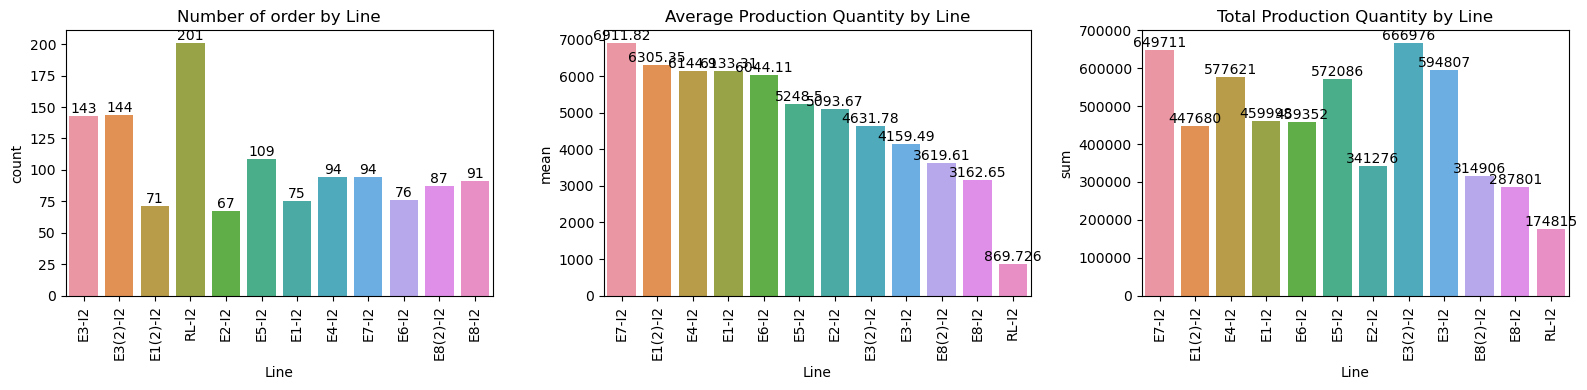

In [137]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))


z = sns.countplot(data=df_I2 , x='Line' , ax=ax[0])
for container in z.containers:
    z.bar_label(container)
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_title('Number of order by Line')

x = sns.barplot(data=avg_buyer_I2, x='Line', y='mean', ax=ax[1])
for container in x.containers:
    x.bar_label(container)
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_title('Average Production Quantity by Line')

y = sns.barplot(data=avg_buyer_I2, x='Line', y='sum', ax=ax[2])
for container in y.containers:
    y.bar_label(container)
ax[2].tick_params(axis='x', rotation=90)
ax[2].set_title('Total Production Quantity by Line')


plt.tight_layout()
plt.show()

In [138]:

df_I2['Target_1'] = df_I2['Target'].map({0: 'Not Achieved' , 1: 'Achieved'})

df_I2.head()

Buyer Program No Sewing Layout No        Style Name  Order Quantity  \
0  SAINSBURYS      T8641        T8641/270  2PK Leggings new           13000   
2  SAINSBURYS      T8364        T8364/258  2PK Leggings new            7500   
3  SAINSBURYS      T8365        T8365/251  2PK Leggings new            9000   
4  SAINSBURYS      T8365        T8365/250  2PK Leggings new            2600   
5  SAINSBURYS      T8166        T8166/232  2PK Leggings new           27500   

       Line  Total Production Quantity  Total SMV  Normal Target  \
0     E3-I2                      13055       2.97            296   
2     E3-I2                       6800       2.97            296   
3  E3(2)-I2                       4898       2.97            296   
4     E3-I2                       2670       2.97            296   
5     E3-I2                       1980       2.97            296   

   Bonus Target  Total Hour  Pre Costing CM  Sewing Layout CM  Achive CM  \
0           355       45.53            4.23               3.0       2.95   
2           355       23.62            3.51               3.0       2.94   
3           355       15.47            3.51               3.0       2.67   
4           355       12.29            3.51               3.0       3.89   
5           355        7.24            3.51               3.0       3.09   

  Line_I2  Target      Target_1  
0      I2       1      Achieved  
2      I2       1      Achieved  
3      I2       1      Achieved  
4      I2       0  Not Achieved  
5      I2       0  Not Achieved

In [139]:
df_I2['Target_1'].value_counts()

Not Achieved    752
Achieved        500
Name: Target_1, dtype: int64

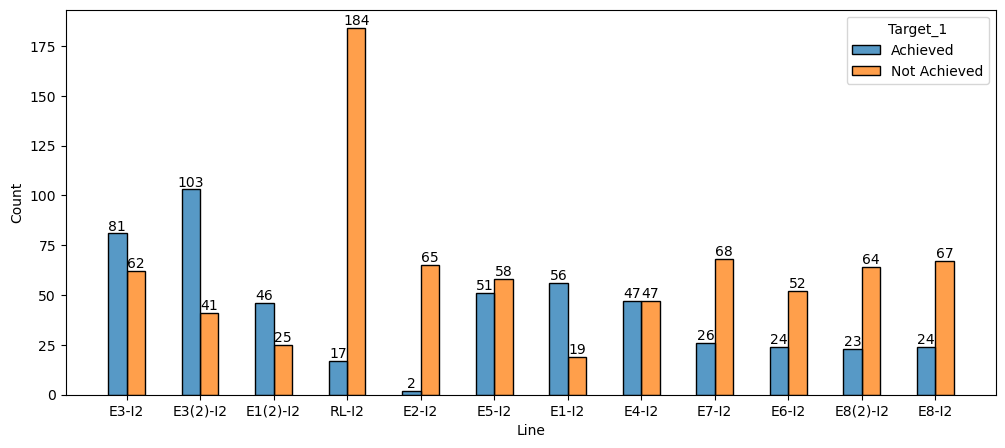

In [140]:
plt.figure(figsize=(12, 5))


ax = sns.histplot(data=df_I2, x='Line', hue='Target_1', multiple='dodge', shrink=0.5)


for container in ax.containers:
    ax.bar_label(container)


plt.show()